# Introduction
Motivation for participating in decarbonization stems from a deep understanding of the urgent need to address the escalating environmental challenges posed by climate change. Decarbonization refers to the process of reducing carbon dioxide and other greenhouse gas emissions in order to mitigate the effects of climate change. It involves transitioning from fossil fuels to cleaner and renewable energy sources, implementing energy-efficient technologies, and adopting sustainable practices across various sectors of society.

 

The motivation to engage in decarbonization arises from a recognition of the detrimental impacts of climate change on our planet and the well-being of future generations. Rising global temperatures, extreme weather events, sea-level rise, and ecological disruptions are just a few examples of the consequences of unchecked carbon emissions. By actively participating in decarbonization efforts, individuals, communities, businesses, and governments aim to mitigate these risks, preserve the natural environment, and create a sustainable future.

 

Decarbonization is vital in our society for several reasons. First and foremost, it is crucial for averting the worst effects of climate change and safeguarding the planet's habitability. By reducing greenhouse gas emissions, we can limit global warming, protect ecosystems, and promote biodiversity. Additionally, decarbonization brings numerous societal benefits, including improved air quality, enhanced public health, and reduced dependency on finite fossil fuel resources. It also drives innovation and economic opportunities, as the transition to clean energy and sustainable practices creates jobs and fosters the development of new technologies and industries. Furthermore, decarbonization helps build resilient communities and promotes social equity by ensuring access to affordable and clean energy for all, regardless of socioeconomic status or geographical location.

 

In summary, the motivation to participate in decarbonization arises from a shared responsibility to combat climate change and secure a sustainable future. By reducing carbon emissions and embracing cleaner alternatives, we can protect the environment, improve public health, drive economic growth, and foster a more equitable society. Decarbonization is not only important for addressing the challenges we face today but also for creating a better world for generations to come.

# Our Solution
Infosys, a leading global technology services and consulting company, has been at the forefront of sustainability and decarbonization efforts. They have a strong commitment to environmental responsibility and have set ambitious goals to become carbon neutral. Infosys has implemented various initiatives to reduce their carbon footprint, including energy-efficient infrastructure, renewable energy adoption, and waste management programs. They have also actively pursued green building certifications and invested in innovative technologies to optimize energy usage across their operations.

 

Our solution, the AI-powered chatbot for energy, cleantech, and sustainability, aligns perfectly with Infosys' goals and vision for becoming carbon neutral. The chatbot's predictive models, optimization module, and intelligent recommendations would provide invaluable support to Infosys in their journey towards decarbonization. By leveraging historical and real-time data, the chatbot can identify peak energy usage patterns, optimize the utilization of renewable energy sources, and suggest energy-saving practices for Infosys' facilities.

 

The chatbot's ability to determine optimal locations for EV charging stations would also be highly beneficial for Infosys. By strategically placing charging infrastructure based on traffic patterns and population density, Infosys can encourage the adoption of electric vehicles among its employees and visitors, further reducing carbon emissions from transportation.

 

Moreover, the chatbot's optimization module, which showcases the ideal energy mix at different times, would empower Infosys to make informed decisions regarding resource allocation and energy distribution. It would assist in maximizing the use of renewable energy sources while minimizing reliance on fossil fuels, resulting in a significant reduction in greenhouse gas emissions.

 

Overall, our solution would complement Infosys' ongoing sustainability efforts and provide a powerful tool to accelerate their journey towards carbon neutrality. By leveraging the chatbot's insights and recommendations, Infosys can optimize their energy usage, further increase the adoption of renewable energy, promote sustainable practices, and drive a culture of environmental responsibility within their organization. The solution would not only assist Infosys in achieving their decarbonization goals but also position them as a leader in sustainable technology and inspire others to follow suit.

# First Checkpoint: Energy mix and grid flexibility requirements

Our proposed solution effectively addresses the challenge of energy mix and grid flexibility requirements. Through the chatbot's predictive models and optimization module, we can analyze historical and real-time data to understand energy demand patterns and identify the optimal energy mix for different time intervals. By leveraging the dataset from PJM Interconnection LLC, which includes over 10 years of hourly energy consumption data, we can train our models to accurately predict energy demand in the region served by PJM.

 

The predictive model will utilize advanced algorithms to analyze historical energy consumption patterns, taking into account factors such as time of day, day of the week, seasonal variations, and specific events that impact energy usage. This analysis allows the model to make accurate predictions about when energy demand is expected to be high or low. By incorporating this information into the chatbot, users can receive real-time recommendations on how to manage energy consumption during periods of high demand, promoting energy efficiency and reducing strain on the grid.

 

 


In conclusion, our solution includes a predictive model trained on PJM's dataset, which enables accurate predictions of energy demand. By leveraging this information, along with the chatbot's optimization capabilities, we can effectively address the energy mix and grid flexibility requirements. This empowers users to make informed decisions, optimize energy usage, and contribute to the decarbonization goals of the PJM region.

[Link to Dataset](https://www.kaggle.com/datasets/selfishgene/historical-hourly-weather-data)


Import libraries for model we are going to make

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error

import tensorflow as tf

Read in data and combine into 1 dataframe

In [3]:
df1 = pd.read_csv('AEP_hourly.csv', index_col='Datetime')
df2 = pd.read_csv('DAYTON_hourly.csv', index_col='Datetime')
df3 = pd.read_csv('PJME_hourly.csv', index_col='Datetime')
df4 = pd.read_csv('PJMW_hourly.csv', index_col='Datetime')

# For visualization purpose
df_final = df1.join([df2, df3, df4])

We want to know basic information ie column headers and null counts

In [4]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121329 entries, 2004-10-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   AEP_MW     121329 non-null  float64
 1   DAYTON_MW  121329 non-null  float64
 2   PJME_MW    121329 non-null  float64
 3   PJMW_MW    121329 non-null  float64
dtypes: float64(4)
memory usage: 4.6+ MB


We want to find the main stats

In [5]:
df_final.describe()

AEP_MW      DAYTON_MW        PJME_MW        PJMW_MW
count  121329.000000  121329.000000  121329.000000  121329.000000
mean    15497.582622    2037.568092   32092.419108    5577.540250
std      2592.455884     393.549103    6489.716271     991.433806
min      9581.000000     982.000000   14544.000000    2553.000000
25%     13628.000000    1748.000000   27606.000000    4874.000000
50%     15308.000000    2009.000000   31398.000000    5489.000000
75%     17200.000000    2279.000000   35644.000000    6229.000000
max     25695.000000    3746.000000   62009.000000    9594.000000

# EDA

We are plotting the data to see trends or observations ...

Text(0.5, 1.0, 'PJM Energy Cosumption')

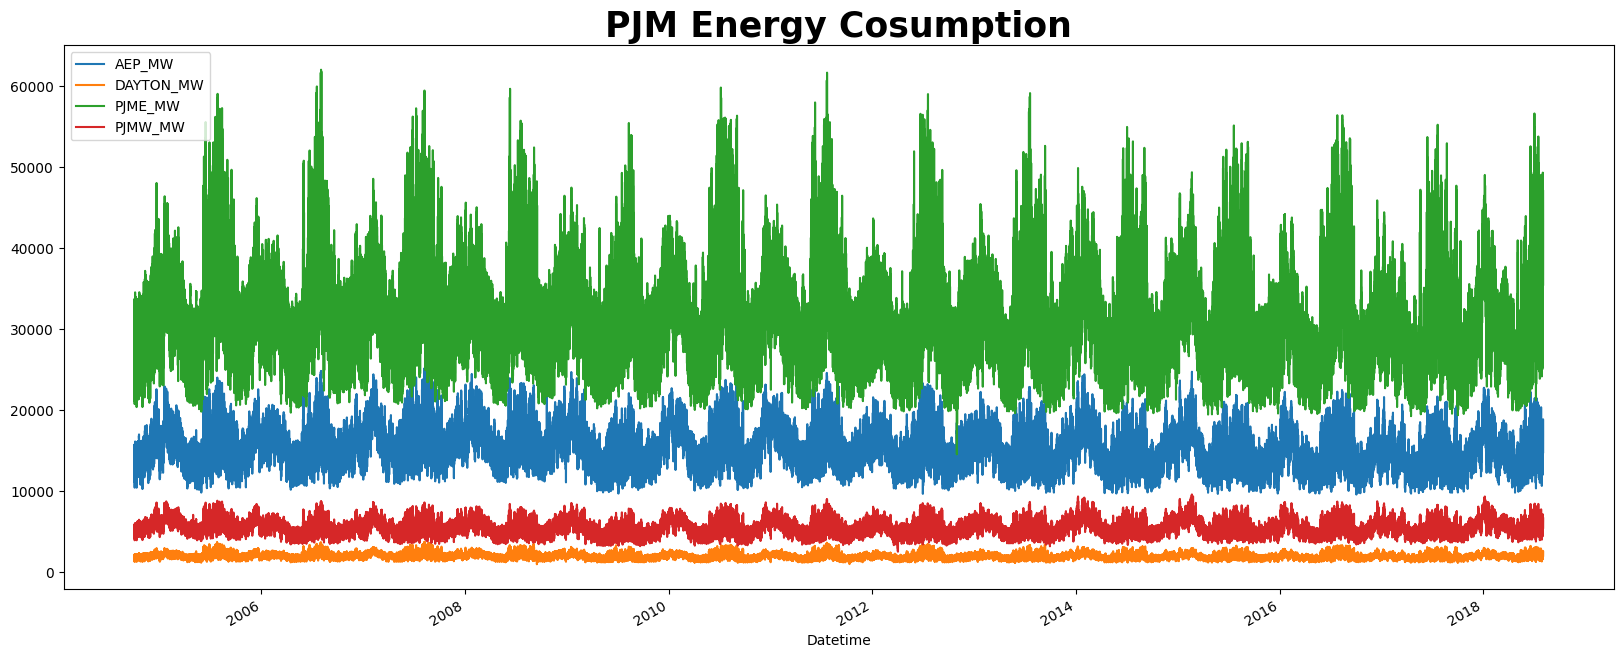

In [6]:
df_final.index = pd.to_datetime(df_final.index)

df_final.plot(figsize=(20,8))
plt.title('PJM Energy Cosumption', weight='bold', fontsize=25)

We want to see which hours are the ones that are high demand

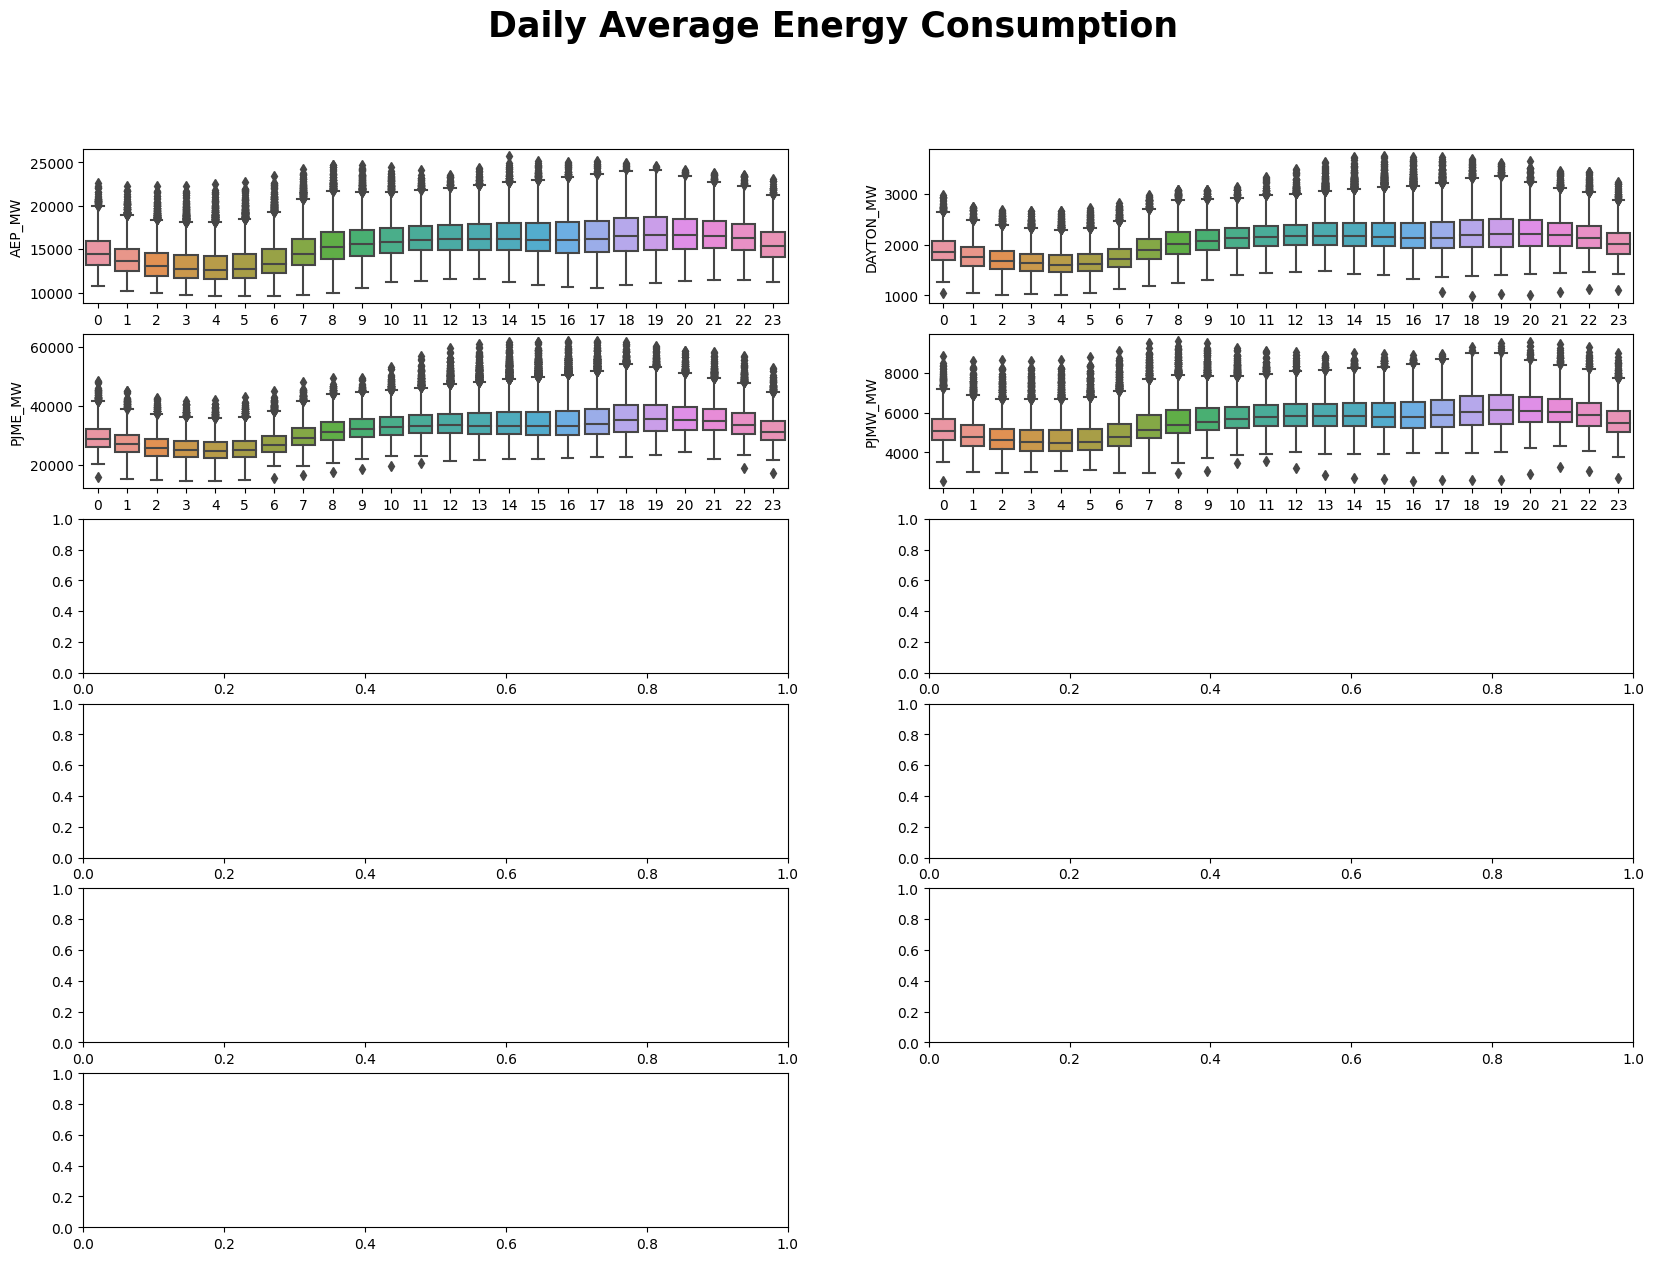

In [7]:
df_final['Hour'] = df_final.index.hour
df_final['Day'] = df_final.index.day
df_final['Month'] = df_final.index.month
df_final['Quarter'] = df_final.index.quarter
df_final['Year'] = df_final.index.year

columns = ['AEP_MW', 'DAYTON_MW', 'PJME_MW', 'PJMW_MW']

f, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 14))
f.suptitle('Daily Average Energy Consumption', weight='bold', fontsize=25)
# We just need 11 figures, so we delete the last one
f.delaxes(axes[5][1])

for i, col in enumerate(columns):
    sns.boxplot(data=df_final, x='Hour', y=col, ax=axes.flatten()[i])

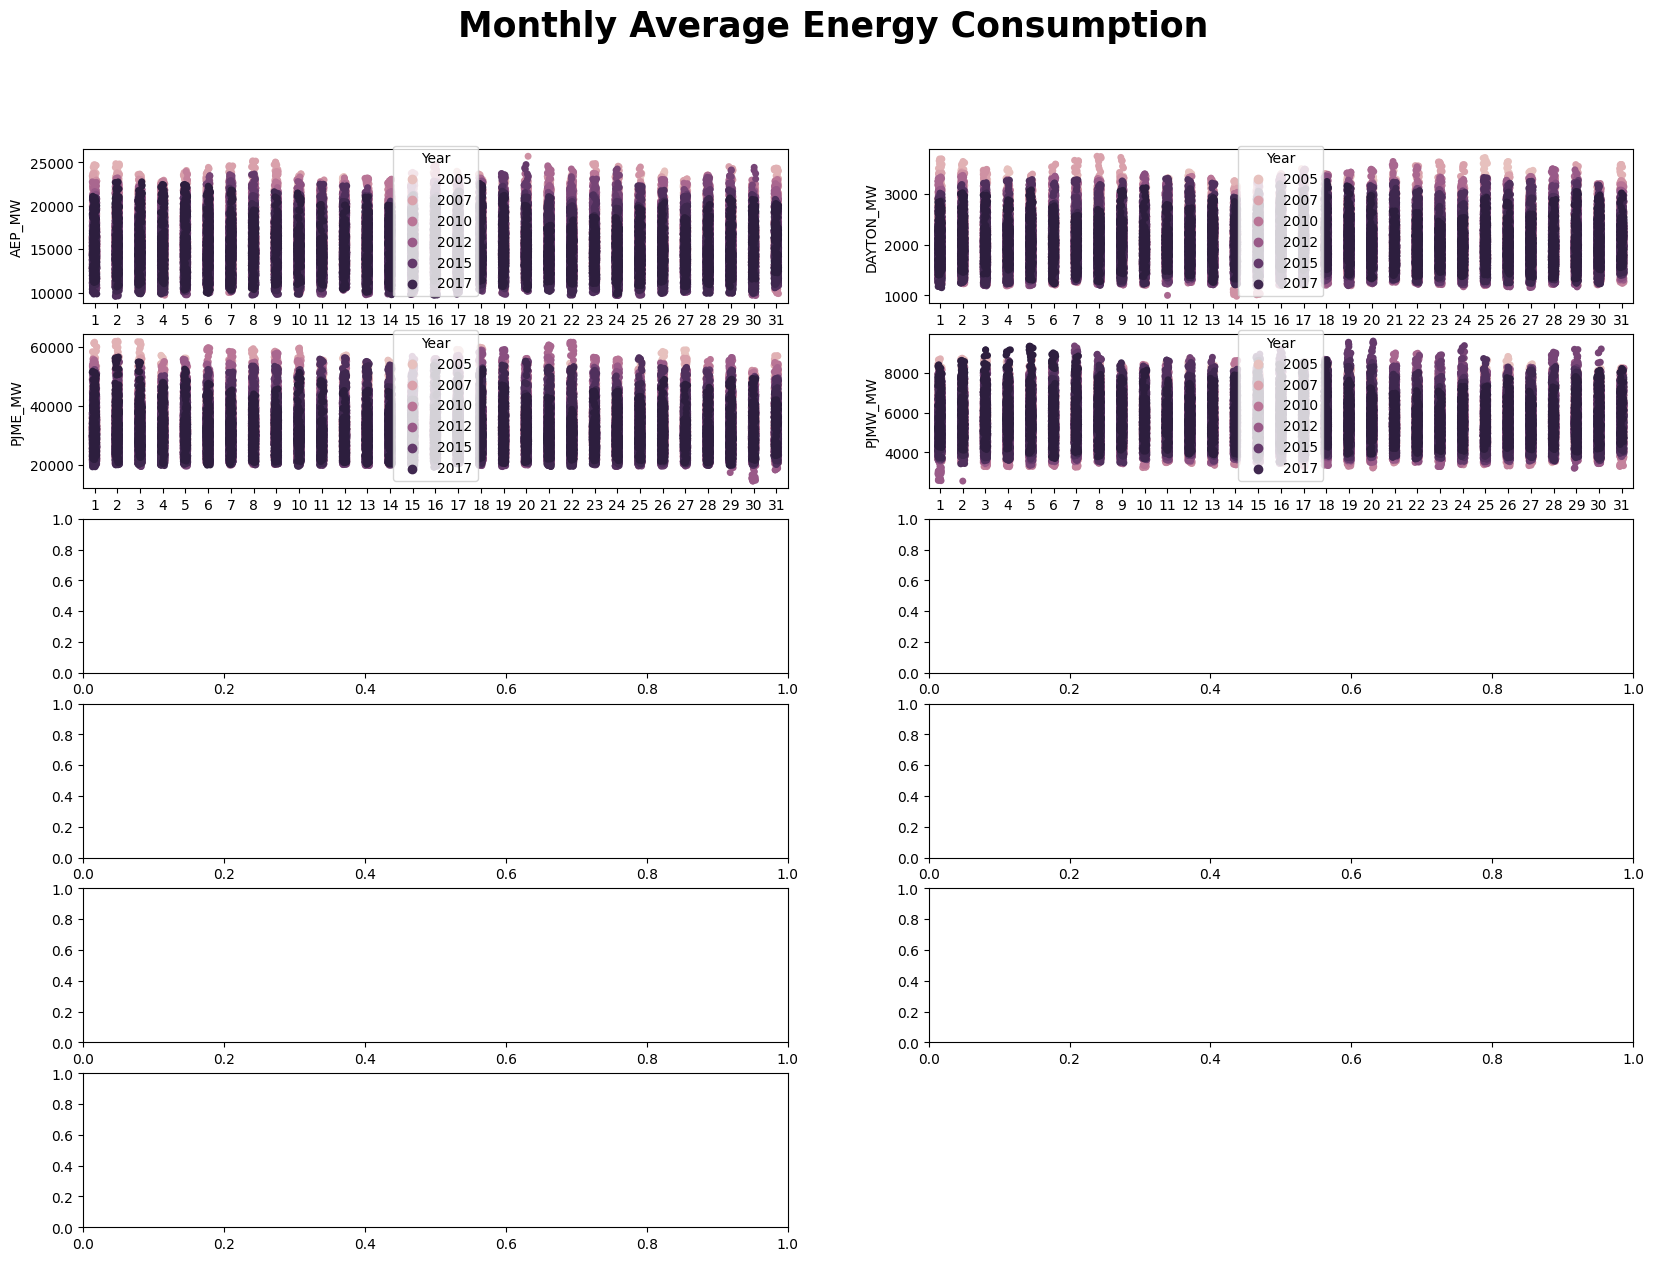

In [8]:
# Things todo: edit the loop such that it shows every year for each state/city
f, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 14))
f.suptitle('Monthly Average Energy Consumption', weight='bold', fontsize=25)
# We just need 11 figures, so we delete the last one
f.delaxes(axes[5][1])

for i, col in enumerate(columns):
    sns.stripplot(data=df_final, x='Day', y=col, ax=axes.flatten()[i],hue = "Year")

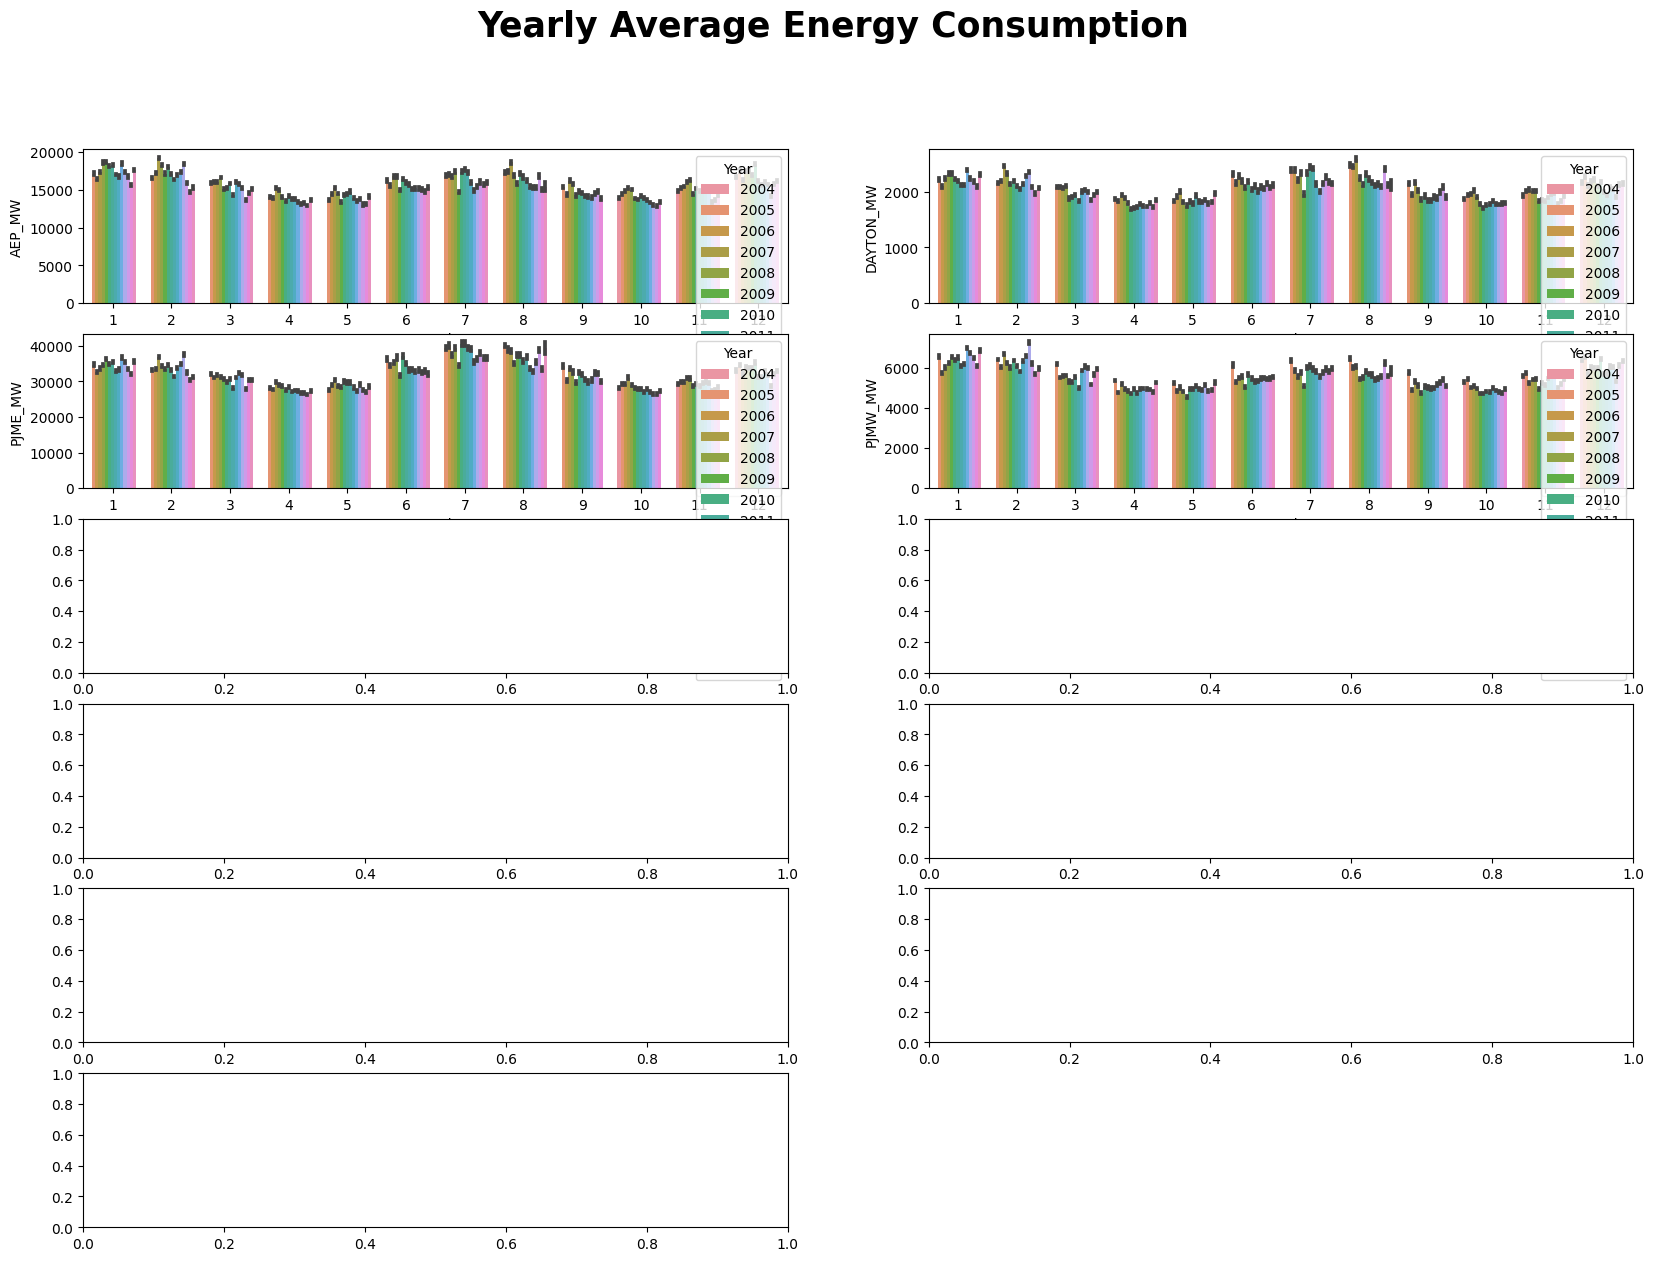

In [9]:
# Things todo: edit the loop such that it shows every year for each state/city 
f, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 14))
f.suptitle('Yearly Average Energy Consumption', weight='bold', fontsize=25)
# We just need 11 figures, so we delete the last one
f.delaxes(axes[5][1])

for i, col in enumerate(columns):
    sns.barplot(data=df_final, x='Month', y=col, ax=axes.flatten()[i], hue = "Year")

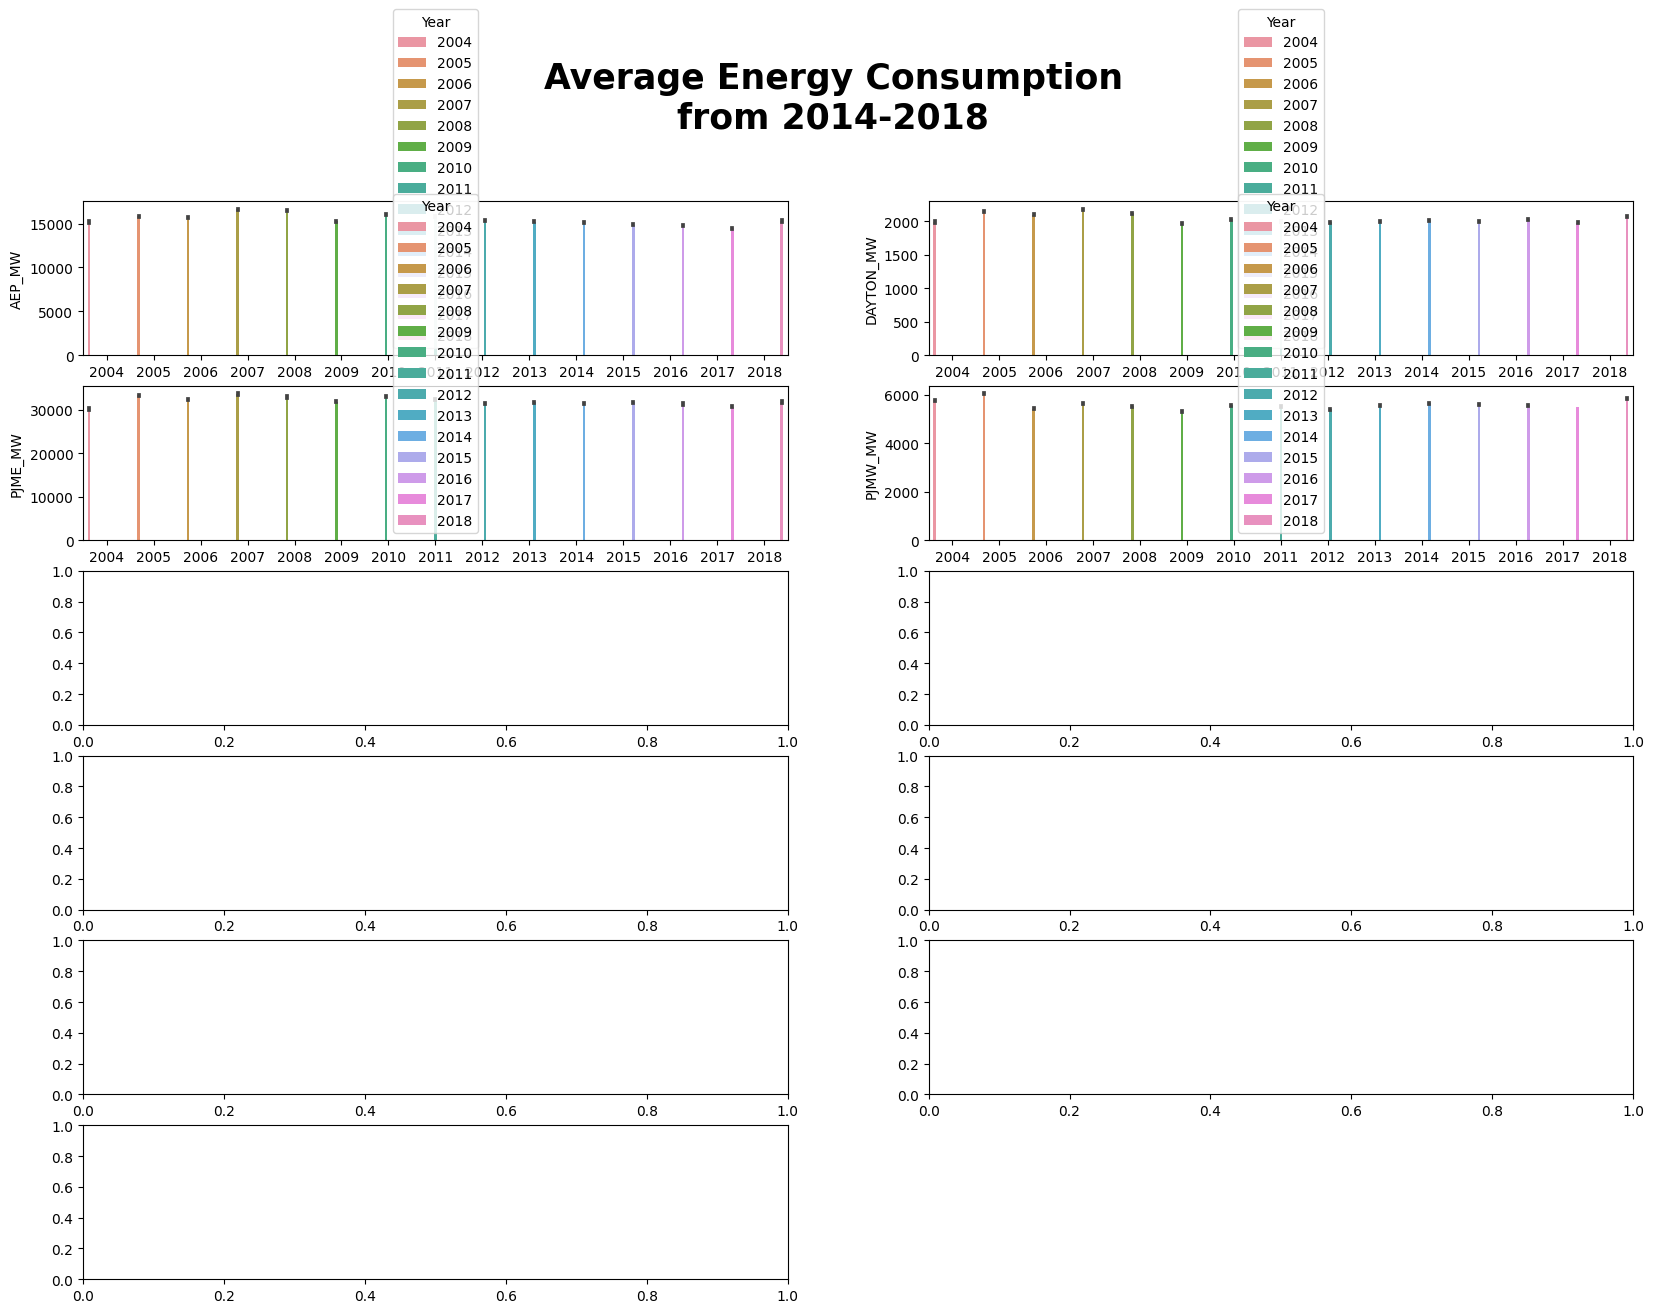

In [10]:
f, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 14))
f.suptitle('Average Energy Consumption\nfrom 2014-2018', weight='bold', fontsize=25)
# We just need 11 figures, so we delete the last one
f.delaxes(axes[5][1])

for i, col in enumerate(columns):
    sns.barplot(data=df_final, x='Year', y=col, ax=axes.flatten()[i], hue="Year")

In [11]:
df1.index = pd.to_datetime(df1.index)
df1 = df1.sort_index()
df2.index = pd.to_datetime(df2.index)
df2 = df2.sort_index()
df3.index = pd.to_datetime(df3.index)
df3 = df3.sort_index()
df4.index = pd.to_datetime(df4.index)
df4 = df4.sort_index()
df1.head()
df2.head()
df3.head()
df4.head()

PJMW_MW
Datetime                    
2002-04-01 01:00:00   4374.0
2002-04-01 02:00:00   4306.0
2002-04-01 03:00:00   4322.0
2002-04-01 04:00:00   4359.0
2002-04-01 05:00:00   4436.0

In [12]:
df2_train, df2_test = df2[df2.index < '2016-01-01'], df2[df2.index >= '2016-01-01']

print('Train:\t', len(df2_train))
print('Test:\t', len(df2_test))

df1_train, df1_test = df1[df1.index < '2016-01-01'], df1[df1.index >= '2016-01-01']

print('Train:\t', len(df1_train))
print('Test:\t', len(df1_test))

df3_train, df3_test = df3[df3.index < '2016-01-01'], df3[df3.index >= '2016-01-01']

print('Train:\t', len(df3_train))
print('Test:\t', len(df3_test))

df4_train, df4_test = df4[df4.index < '2016-01-01'], df4[df4.index >= '2016-01-01']

print('Train:\t', len(df4_train))
print('Test:\t', len(df4_test))

Train:	 98595
Test:	 22680
Train:	 98593
Test:	 22680
Train:	 122686
Test:	 22680
Train:	 120526
Test:	 22680


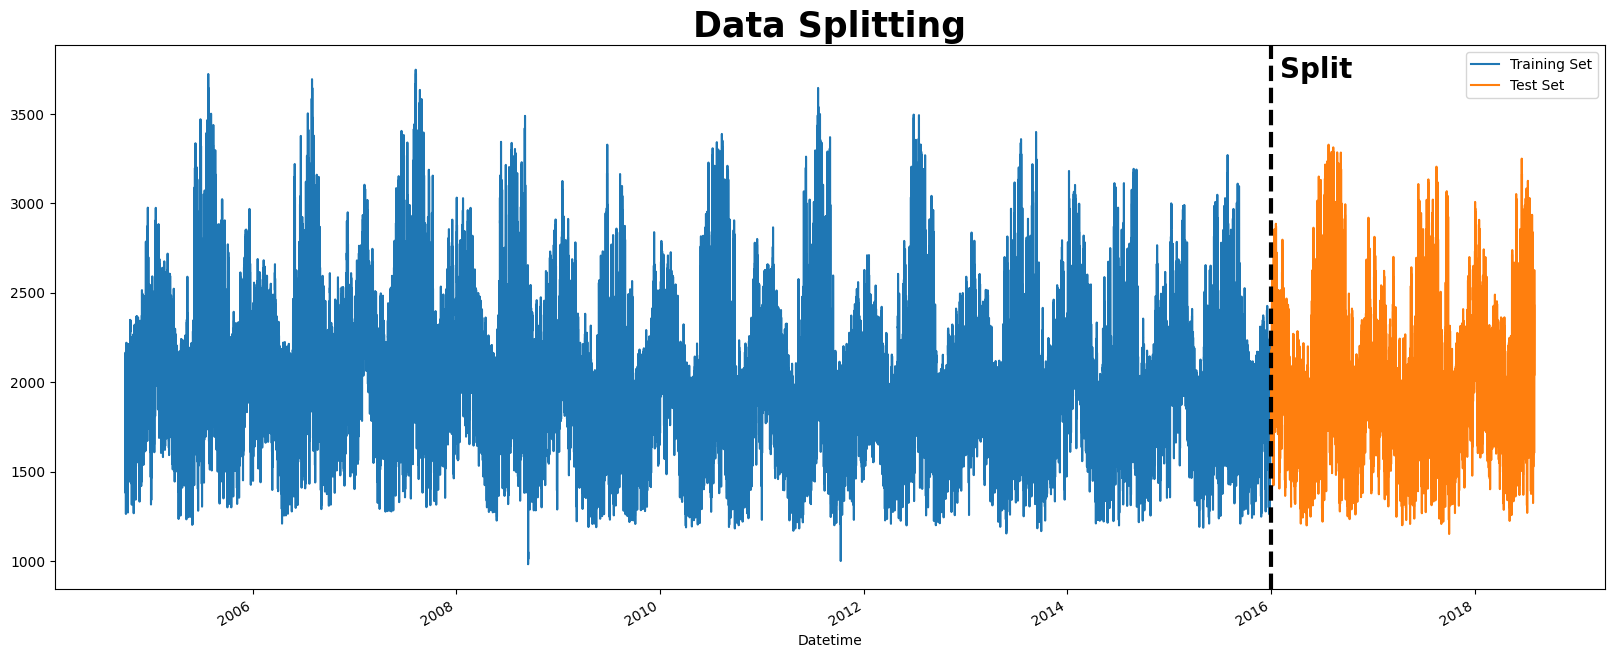

In [13]:
plt.figure(figsize=(20,8))

df2_train['DAYTON_MW'].plot(label='Training Set')
df2_test['DAYTON_MW'].plot(label='Test Set')
plt.axvline('2016-01-01', color='black', ls='--', lw=3)
plt.text('2016-02-01', 3700, 'Split', fontsize=20, fontweight='bold')
plt.title('Data Splitting', weight='bold', fontsize=25)
plt.legend()

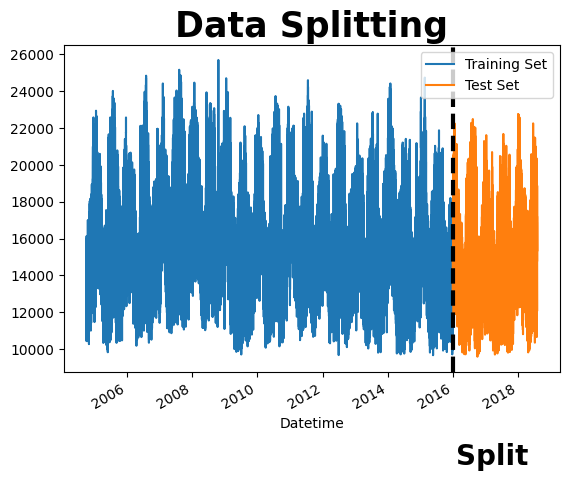

In [14]:
df1_train['AEP_MW'].plot(label='Training Set')
df1_test['AEP_MW'].plot(label='Test Set')
plt.axvline('2016-01-01', color='black', ls='--', lw=3)
plt.text('2016-02-01', 3700, 'Split', fontsize=20, fontweight='bold')
plt.title('Data Splitting', weight='bold', fontsize=25)
plt.legend()

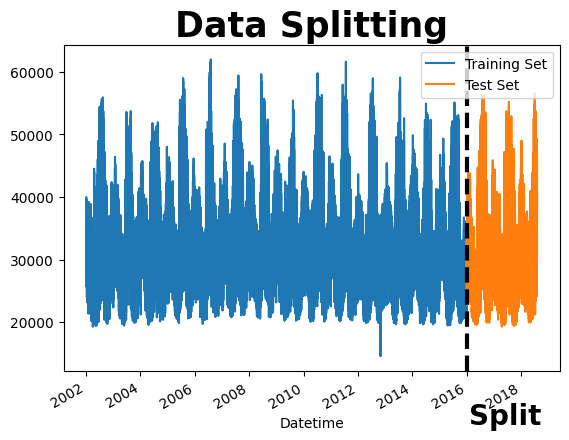

In [15]:
df3_train['PJME_MW'].plot(label='Training Set')
df3_test['PJME_MW'].plot(label='Test Set')
plt.axvline('2016-01-01', color='black', ls='--', lw=3)
plt.text('2016-02-01', 3700, 'Split', fontsize=20, fontweight='bold')
plt.title('Data Splitting', weight='bold', fontsize=25)
plt.legend()

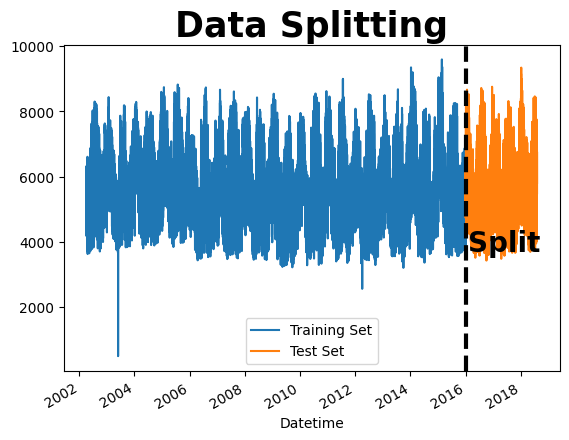

In [16]:
df4_train['PJMW_MW'].plot(label='Training Set')
df4_test['PJMW_MW'].plot(label='Test Set')
plt.axvline('2016-01-01', color='black', ls='--', lw=3)
plt.text('2016-02-01', 3700, 'Split', fontsize=20, fontweight='bold')
plt.title('Data Splitting', weight='bold', fontsize=25)
plt.legend()

In [17]:
# EXAMPLE

dataset = tf.expand_dims(df2_train['DAYTON_MW'].head(10), axis=-1)

# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.from_tensor_slices(dataset)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# dataset2 = tf.expand_dims(df_train['PJME_MW'].head(10), axis=-1)

# # Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
# dataset2 = tf.data.Dataset.from_tensor_slices(dataset2)

# # Window the data but only take those with the specified size
# dataset2 = dataset2.window(5, shift=1, drop_remainder=True)

# # Flatten the windows by putting its elements in a single batch
# dataset2 = dataset2.flat_map(lambda window: window.batch(5))

# # Create tuples with features (first four elements of the window) and labels (last element)
# dataset2 = dataset2.map(lambda window: (window[:-1], window[-1]))

# dataset3 = tf.expand_dims(df_train['PJMW_MW'].head(10), axis=-1)

# # Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
# dataset3 = tf.data.Dataset.from_tensor_slices(dataset3)

# # Window the data but only take those with the specified size
# dataset3 = dataset3.window(5, shift=1, drop_remainder=True)

# # Flatten the windows by putting its elements in a single batch
# dataset3 = dataset3.flat_map(lambda window: window.batch(5))

# # Create tuples with features (first four elements of the window) and labels (last element)
# dataset3 = dataset3.map(lambda window: (window[:-1], window[-1]))

# Print the results
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())
    print()
    
# dataset1 = tf.expand_dims(df_train['AEP_MW'].head(10), axis=-1)

# # Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
# dataset1 = tf.data.Dataset.from_tensor_slices(dataset1)

# # Window the data but only take those with the specified size
# dataset1 = dataset1.window(5, shift=1, drop_remainder=True)

# # Flatten the windows by putting its elements in a single batch
# dataset1 = dataset1.flat_map(lambda window: window.batch(5))

# # Create tuples with features (first four elements of the window) and labels (last element)
# dataset1 = dataset1.map(lambda window: (window[:-1], window[-1]))

# # Print the results
# for x,y in dataset1:
#     print("x = ", x.numpy())
#     print("y = ", y.numpy())
#     print()
    
# # Print the results
# for x,y in dataset2:
#     print("x = ", x.numpy())
#     print("y = ", y.numpy())
#     print()
    
# # Print the results
# for x,y in dataset3:
#     print("x = ", x.numpy())
#     print("y = ", y.numpy())
#     print()

x =  [[1621.]
 [1536.]
 [1500.]
 [1434.]]
y =  [1489.]

x =  [[1536.]
 [1500.]
 [1434.]
 [1489.]]
y =  [1620.]

x =  [[1500.]
 [1434.]
 [1489.]
 [1620.]]
y =  [1859.]

x =  [[1434.]
 [1489.]
 [1620.]
 [1859.]]
y =  [2007.]

x =  [[1489.]
 [1620.]
 [1859.]
 [2007.]]
y =  [2025.]

x =  [[1620.]
 [1859.]
 [2007.]
 [2025.]]
y =  [2067.]



In [18]:
def windowing(data, window_size, shuffle_buffer, batch_size):
    dataset = tf.expand_dims(data, axis=-1)
    dataset = tf.data.Dataset.from_tensor_slices(dataset)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True) # window size = 24 + 1 (test)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1])) # (train, test) 
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [19]:
train = windowing(df2_train['DAYTON_MW'], 24, 72, 32)
test = windowing(df2_test['DAYTON_MW'], 24, 72, 32)
# train1 = windowing(df_train['PJME_MW'], 24, 72, 32)
# test1 = windowing(df_test['PJME_MW'], 24, 72, 32)
# train2 = windowing(df_train['AEP_MW'], 24, 72, 32)
# test2 = windowing(df_test['AEP_MW'], 24, 72, 32)
# train3 = windowing(df_train['PJME_MW'], 24, 72, 32)
# test3 = windowing(df_test['PJME_MW'], 24, 72, 32)

In [20]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[24,1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, activation='relu')),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1)
])

dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 16)            64        
                                                                 
 bidirectional (Bidirection  (None, 32)                4224      
 al)                                                             
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4833 (18.88 KB)
Trainable params: 4833 (18.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
dnn_model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
dnn_model.fit(train, validation_data=test, epochs=10)

Epoch 1/10
3081/3081 [==============================] - 17s 5ms/step - loss: 191.1281 - val_loss: 152.2399
Epoch 2/10
3081/3081 [==============================] - 16s 5ms/step - loss: 158.8865 - val_loss: 153.1199
Epoch 3/10
3081/3081 [==============================] - 16s 5ms/step - loss: 157.4390 - val_loss: 155.1867
Epoch 4/10
3081/3081 [==============================] - 16s 5ms/step - loss: 155.9127 - val_loss: 151.4543
Epoch 5/10
3081/3081 [==============================] - 16s 5ms/step - loss: 156.3754 - val_loss: 156.3150
Epoch 6/10
3081/3081 [==============================] - 16s 5ms/step - loss: 141.2518 - val_loss: 120.3093
Epoch 7/10
3081/3081 [==============================] - 16s 5ms/step - loss: 112.4310 - val_loss: 97.2939
Epoch 8/10
3081/3081 [==============================] - 17s 5ms/step - loss: 124.0674 - val_loss: 86.4725
Epoch 9/10
3081/3081 [==============================] - 16s 5ms/step - loss: 74.4184 - val_loss: 48.2596
Epoch 10/10
3081/3081 [==================

<Axes: >

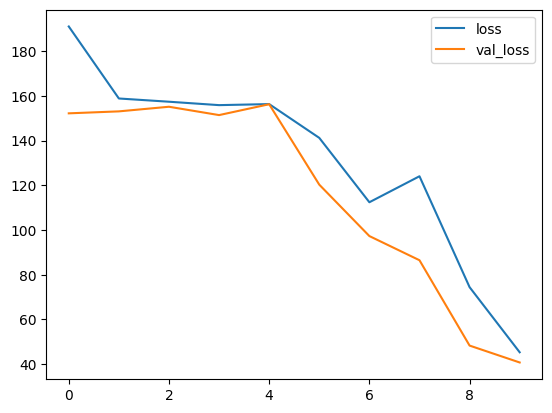

In [22]:
metric = pd.DataFrame(dnn_model.history.history)
metric.plot()

In [23]:
window_size = 24
forecast = []

train_length = len(df2_train)
forecast_series = df2[train_length - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
    forecast.append(dnn_model.predict(np.expand_dims(forecast_series[time:time + window_size], axis=-1)[np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 7ms/step


/var/folders/12/3t8j_m251x73pvd20fmcj4_c0000gq/T/ipykernel_11920/779235909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_test['Pred'] = results


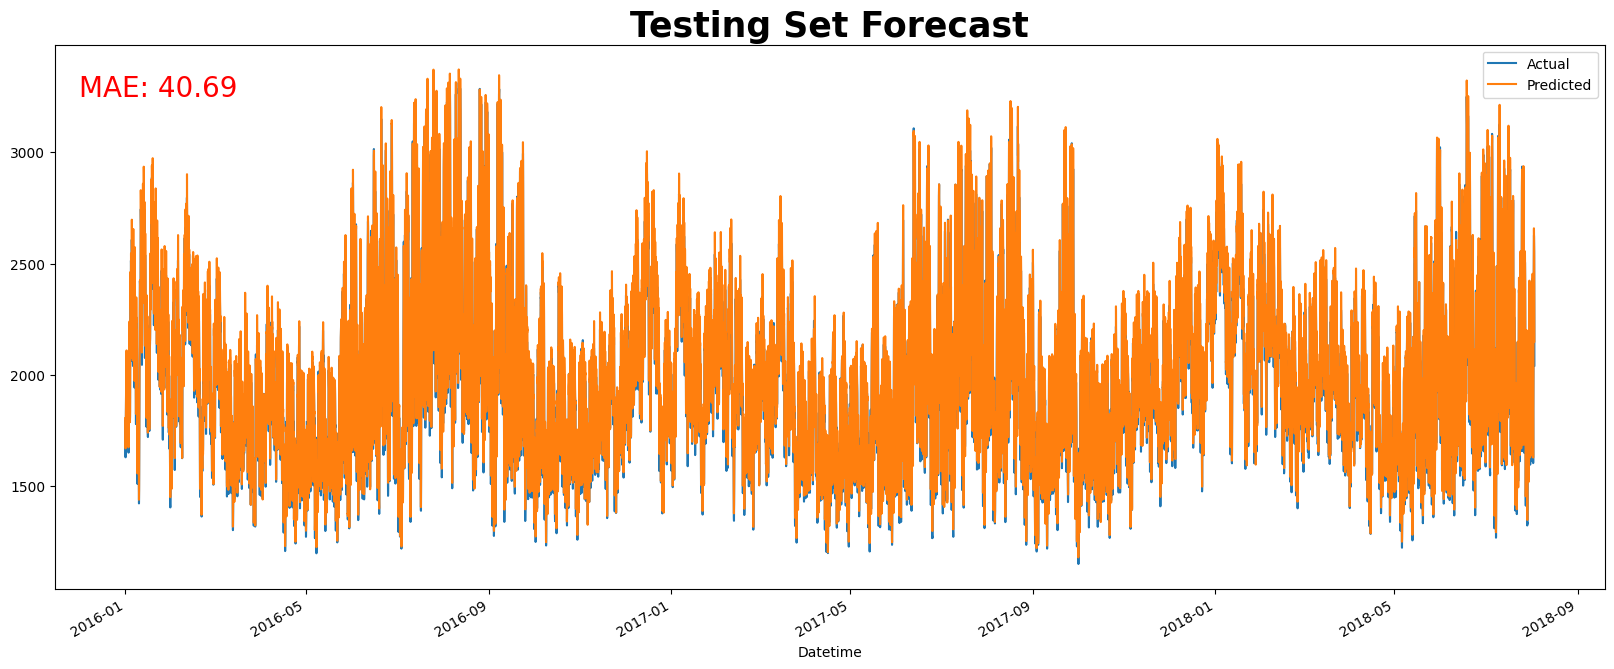

In [24]:
df2_test['Pred'] = results

mae = round(mean_absolute_error(df2_test['DAYTON_MW'], df2_test['Pred']), 3)

plt.figure(figsize=(20,8))

df2_test['DAYTON_MW'].plot(label='Actual')
df2_test['Pred'].plot(label='Predicted')
plt.text(16770, 3250, 'MAE: {}'.format(mae), fontsize=20, color='red')
plt.title('Testing Set Forecast', weight='bold', fontsize=25)
plt.legend()
plt.show()

# Second Checkpoint: EV charging and infrastructure

Our proposed solution effectively tackles the challenge of EV charging infrastructure by leveraging AI algorithms and data analysis techniques. To address this issue, our solution incorporates geographical data such as traffic patterns and population density. By acquiring and analyzing this data, we can gain valuable insights into areas with high traffic volume and concentrated population, which are prime locations for EV charging stations.

 

Using AI algorithms, we can optimize the placement of EV chargers based on the analyzed data. The algorithms consider factors such as traffic congestion, commuting patterns, and population distribution to identify optimal locations for charging stations. By strategically placing chargers in areas where EV demand is high and where drivers frequently commute, we can ensure convenient access to charging infrastructure and promote the adoption of electric vehicles.

 

Furthermore, the chatbot's interactive interface allows users to input specific preferences or requirements for EV charging, such as proximity to certain landmarks or availability of fast charging options. The chatbot can then generate customized recommendations that align with the user's preferences and optimize the overall charging infrastructure network.

 

In conclusion, our solution effectively addresses the challenge of EV charging and infrastructure by leveraging AI algorithms and analyzing geographical data. By optimizing the placement of EV chargers based on traffic patterns and population density, we can ensure that charging infrastructure is strategically located to cater to the needs of EV owners. This not only facilitates the widespread adoption of electric vehicles but also contributes to the decarbonization goals of reducing greenhouse gas emissions from the transportation sector.

# Third Checkpoint: The need for longer-term backup capacity
Our proposed solution effectively addresses the need for longer-term backup capacity by leveraging AI models and predictive analysis. To tackle this challenge, we have developed an AI model that takes into account historical data from two solar plants in India spanning the last 34 days. This data includes power generation patterns, solar irradiance levels, weather conditions, and other relevant factors.

 

By training the AI model on this dataset, we can accurately predict future power generation from the solar plants. This enables us to anticipate periods of high or low solar energy availability, which is crucial for planning backup capacity. For instance, if the AI model predicts a period of low solar power generation due to cloudy weather or other factors, it alerts the chatbot and prompts recommendations for alternative energy sources or backup systems to be activated during that period.

 

The chatbot interacts with users in real-time, providing information and suggestions based on the AI model's predictions. It can suggest the activation of backup systems or advise on energy conservation measures during periods of reduced solar power generation. By incorporating these predictions and recommendations into the chatbot's functionality, we enable electrical companies to plan for and manage longer-term backup capacity effectively.

 

In conclusion, our solution addresses the need for longer-term backup capacity by utilizing AI models and predictive analysis. By training the AI model on data from solar plants in India, we can accurately forecast power generation in the future. This information allows the chatbot to provide timely recommendations and assist electrical companies in planning backup capacity during periods of reduced solar energy availability. With our solution, companies can optimize their backup systems, ensure uninterrupted power supply, and contribute to a more reliable and sustainable energy infrastructure.

[Link to Dataset](https://www.kaggle.com/datasets/anikannal/solar-power-generation-data)

In [25]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter
from sys import getsizeof

# import for improving a colorbar
from matplotlib.colors import rgb2hex, Normalize;
from matplotlib import rcParams

# Machine learning imports
from sklearn.preprocessing import LabelEncoder, StandardScaler;
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit, cross_validate;
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge;
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR;
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import mean_squared_error, r2_score;

# Statistical aids
from scipy.stats import kurtosis, skew;

# initialize settings
from cycler import cycler
rcParams['axes.prop_cycle'] = cycler(
                                color=['navy','orange','k','b',
                                       'y','pink', 'magenta','cyan',
                                       'r','midnightblue',]
                                    )

# for ploting residuals distribution
from ipywidgets import widgets, interact

In [26]:
# prod_p1 is for: Production of plant #1 
prod_p1 = pd.read_csv('solar_data/Plant_1_Generation_Data.csv')
prod_p1.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0

In [27]:
prod_p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [28]:
prod_p1.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06

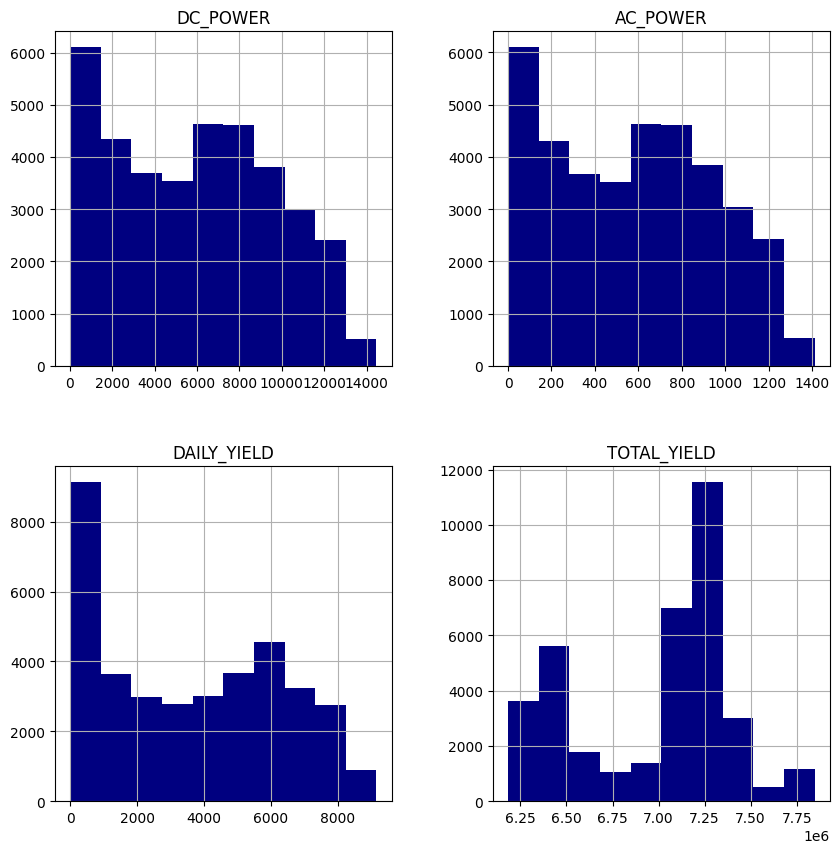

In [29]:
# Histogram of all non zero values
sample_df = prod_p1.loc[:, prod_p1.columns != 'PLANT_ID']
sample_df = sample_df[(prod_p1['DAILY_YIELD'] > 0) & (prod_p1['AC_POWER'] > 0)]
sample_df.hist(figsize=(10,10))
plt.show()

## Observations:

In [30]:
def optimize_formats(df):
    
    if df.columns[0].isupper():
        initial_size = getsizeof(df)
        supp_data = dict({'plant_id':0,'source_key':[]})
        
        # change column names to lowercase
        lower_case = lambda date: date.lower()
        df.columns = map(lower_case,df.columns)

        # encode "source_key" into integers, store riginal "source_key" in separate variable  
        encoder = LabelEncoder()
        encoder.fit(np.unique(df['source_key']))
        df['source_key']= np.array(encoder.transform(df['source_key'].values),dtype=np.int8)
        supp_data['source_key'] = encoder.classes_

        # delete "plant_id" column and stores it's value in an external variable"
        plant_id = df['plant_id'].values[0]
        df.drop(columns=['plant_id'],inplace=True)
        supp_data['plant_id'] = plant_id

        # change 'date_time' from string to pd.Timestamp
        df['date_time'] =pd.to_datetime(df['date_time'].values, dayfirst=True)
        final_size = getsizeof(df) + getsizeof(supp_data)
        print(f'Initial size: {initial_size/1e6:.2f} Mb')
        print(f'Final size:    {final_size/1e6:.2f} Mb')
        print(f"Memory footprint reduction: {(initial_size - final_size)/initial_size*100:.2f}%")
    else:
        raise ValueError("Formats allready optimized !")
    return df, supp_data

In [31]:
prod_p1, prod_p1_supp_data = optimize_formats(prod_p1)

Initial size: 12.72 Mb
Final size:    2.82 Mb
Memory footprint reduction: 77.84%


In [32]:
prod_p1_supp_data['source_key'],prod_p1_supp_data['plant_id']

(array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
        '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
        'WRmjgnKYAwPKWDb', 'YxYtjZvoooNbGkE', 'ZnxXDlPa8U1GXgE',
        'ZoEaEvLYb1n2sOq', 'adLQvlD726eNBSB', 'bvBOhCH3iADSZry',
        'iCRJl6heRkivqQ3', 'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj',
        'rGa61gmuvPhdLxV', 'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc',
        'wCURE6d3bPkepu2', 'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY',
        'zVJPv84UY57bAof'], dtype=object),
 4135001)

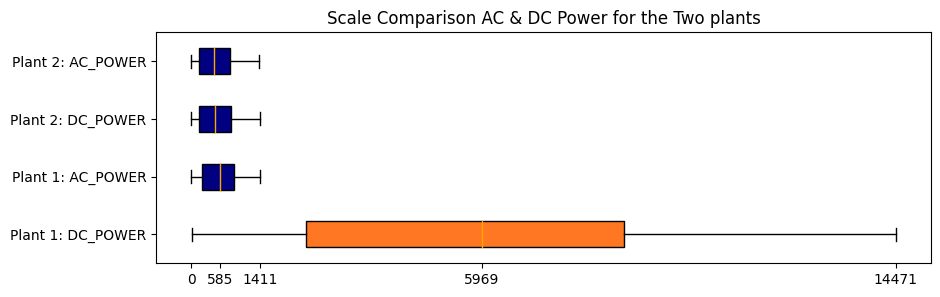

In [33]:
prod_p1_dc_power = prod_p1[prod_p1['dc_power'] > 0]['dc_power'].values
prod_p1_ac_power = prod_p1[prod_p1['ac_power'] > 0]['ac_power'].values

prod_p2 = pd.read_csv('solar_data/Plant_2_Generation_Data.csv')
prod_p2_dc_power =prod_p2[prod_p2['DC_POWER'] > 0]['DC_POWER'].values
prod_p2_ac_power =prod_p2[prod_p2['AC_POWER'] > 0]['AC_POWER'].values

data = [prod_p1_dc_power,prod_p1_ac_power,prod_p2_dc_power,prod_p2_ac_power]
labels = ['Plant 1: DC_POWER','Plant 1: AC_POWER',
            'Plant 2: DC_POWER','Plant 2: AC_POWER']
plt.figure(figsize=(10,3))
patches = plt.boxplot(data ,labels=labels,vert=False, patch_artist=True)
patches['boxes'][0].set_facecolor( '#FF7722')
plt.xticks([0,np.median(prod_p1_ac_power),prod_p1_ac_power.max(),
            np.median(prod_p1_dc_power),prod_p1_dc_power.max()])
plt.title("Scale Comparison AC & DC Power for the Two plants")

plt.show()


In [34]:
plant2_eff = 100*np.max(prod_p2_ac_power)/np.max( prod_p2_dc_power)
print(f"Power ratio AC/DC (Efficiency) plant #2: {plant2_eff:0.3f}%")
plant1_eff = 100*np.max(prod_p1_ac_power)/np.max(prod_p1_dc_power )
print(f"Power ratio AC/DC (Efficiency) plant #1:  {plant1_eff:0.3f}%")
print(f"Eff_plant_1/Eff_plant_2 (using max values): {plant2_eff/plant1_eff:.3f}")

Power ratio AC/DC (Efficiency) plant #2: 97.501%
Power ratio AC/DC (Efficiency) plant #1:  9.750%
Eff_plant_1/Eff_plant_2 (using max values): 10.000


In [35]:
efficiency = ((prod_p2_ac_power)/np.mean(prod_p2_dc_power))/(np.mean(prod_p1_ac_power)/np.mean(prod_p1_dc_power))
print(f"Scale ratio comparison ( using mean values ): {efficiency.mean():.3f}")

Scale ratio comparison ( using mean values ): 10.001


In [36]:
# rescaling dc_power of plant #1
def scale_dc_power(df):
    df['dc_power'] = df['dc_power'].values/10
    return df

In [37]:
prod_p1 = scale_dc_power(prod_p1)

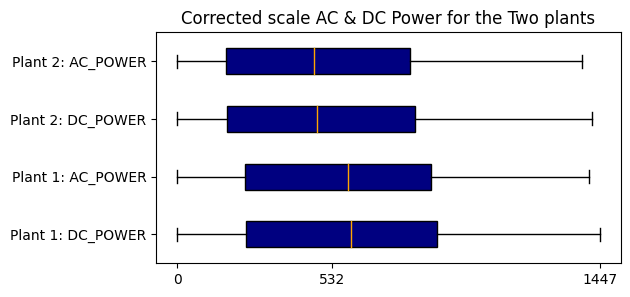

In [38]:
prod_p1_dc_power = prod_p1['dc_power'][prod_p1['dc_power']>0].values
data2 = [prod_p1_dc_power,prod_p1_ac_power,prod_p2_dc_power,prod_p2_ac_power]
plt.figure(figsize=(6,3))
patches = plt.boxplot(data2,showfliers=False, vert=False,labels=labels, patch_artist=True)
median_2 = np.median(np.hstack(data2))
max_val_2 = prod_p1_dc_power.max()
plt.xticks([0,median_2,max_val_2])
plt.title("Corrected scale AC & DC Power for the Two plants")
# fig.tight_layout(pad=5)
plt.show()

In [39]:
def plot_inverter(df, supp_data, key_n, start=0, end=3400):
    '''
    Visualizes the ac_power, dc_power, daily_yield and total_yield of
    an inverter in a given datetime interval
    
    returns: List of pyplot.axes for the 4 variables.
    
    Variables
    ---------
    df   : Pandas DataFrame with the production data
    key_n: int from 0 to 21 representing the inverter number
    start: int (0-3400) representing the start datetime
    end  : int (0-3400) representing the end datetime
    '''
    
    df = df.copy()
    fig_size = (12,12)
    fig = plt.figure(figsize=fig_size)
    for i,item in enumerate(['ac_power','dc_power','daily_yield',
                             'total_yield']):
        xsize,ysize = fig_size
        key_data = df[df['source_key'] == key_n].iloc[start:end]
        plt.subplot(4,1,i+1)
        plt.plot(key_data['date_time'].values, key_data[item].values,
                 linewidth=1.5,alpha=.4)
        ymin = key_data[item].values.min()
        ymax = key_data[item].values.max() 
        plt.yticks(np.linspace(ymin, ymax, 5))
#       plt.xticks(key_data['date_time'],key_data['date_time'],rotation=90)
        plt.xticks([]) # plotting the xlabels takes too much time !!!

        key  = supp_data['source_key'][key_n]
        start_date= pd.to_datetime(key_data['date_time'].iloc[0]).date()
        end_date  = pd.to_datetime(key_data['date_time'].iloc[-1]).date()
        text=f'{item}, inverter #{key_n} ({key})\nfrom {start_date} to {end_date}'
        plt.title(text, fontsize=12)
    fig.subplots_adjust(hspace=0.3)
#     plt.savefig(f'inverter_{key}.png')
    return fig.axes


In [40]:
# a sample taken from one of the inverters
# in the arrows dict xy are pints as % of x and y axis
# in xy are 4 matrices, one for each plot 'ac_power', 'dc_power',
#         'daily_yield' & 'total_yield'

arrows =   dict({
            'saffron_arrows':
            dict({'color':'#FF7722','angle':140,
                  'xy': [[[.280,.1]],
                         [[.280,.1]],
                         [[.295,.1],[.785,.05]],
                         []]}),
            'green_arrows':
            dict({'color':'g','angle':15,
                  'xy':[[],
                        [],
                        [[.39,.79],[.64,.85],[.7,.73],[.82,.88]],
                        []]})
                })

def annotate_arrows(axes,arrows):
    for j,ax in enumerate(axes):
        for i,arrow in enumerate(arrows.values()):
            for xy_raw in arrow['xy'][j]:
                rad = lambda angle: angle/360*2*np.pi
                xmin,xmax = ax.get_xlim()
                xspan = xmax-xmin
                ymin,ymax = ax.get_ylim()
                yspan = ymax-ymin
                xy_new = np.multiply(xy_raw,[xspan,yspan])+np.array([xmin,ymin])
                xy_text= np.array(xy_new)+ np.array([
                                    0.041*np.cos(rad(arrow['angle']))*xspan,
                                    0.250*np.sin(rad(arrow['angle']))*yspan])
                ax.annotate("",xy=xy_new,xytext=xy_text,
                            arrowprops=dict(arrowstyle="->",mutation_aspect=1.2,
                            mutation_scale=15,color=arrow['color'],lw=3))

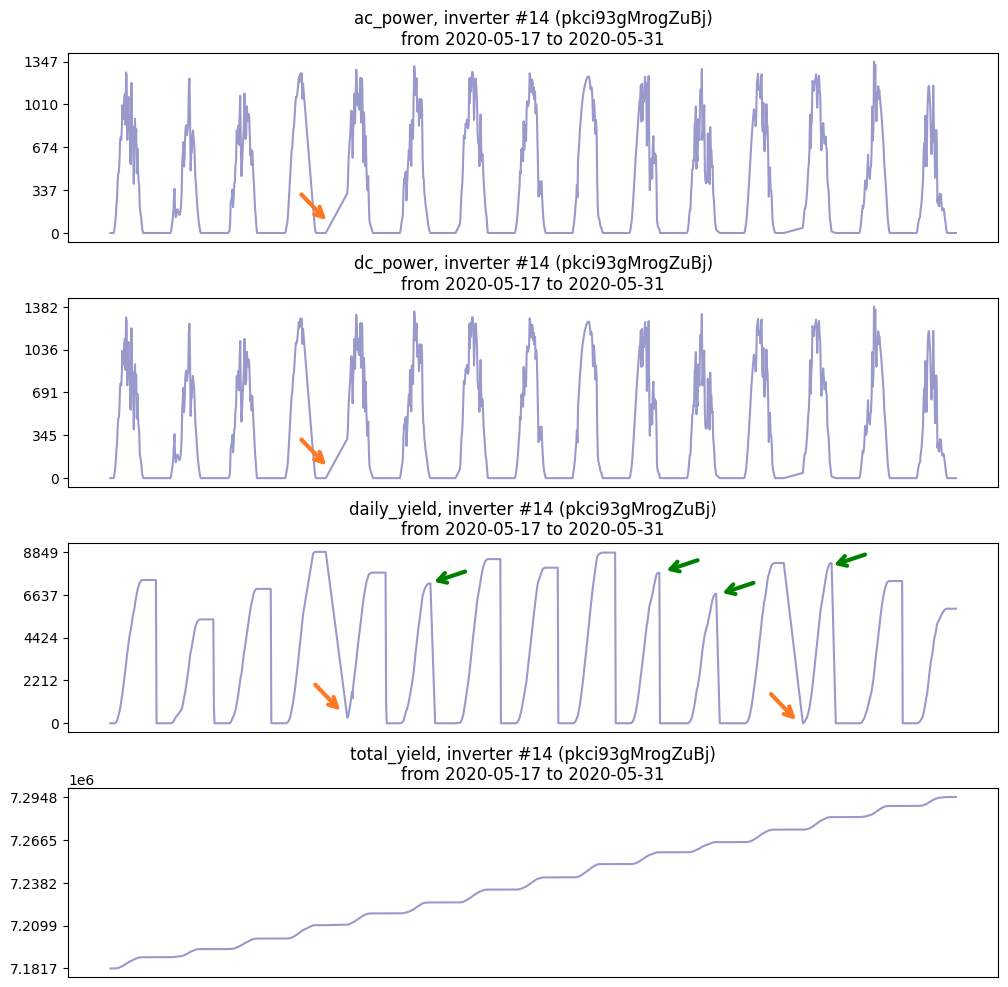

In [41]:
#values for key_n= 14, start=200, end=1500
axes = plot_inverter(prod_p1,prod_p1_supp_data,14,start=200,end=1500)
annotate_arrows(axes, arrows)

In [42]:
def plot_all_ac_power(prod_df):
    '''this function plot all values for ac_power to visualize
    at which time the solar power plant begins and ends production
    to be able to separate day from night'''
    
    date_time = pd.DatetimeIndex(prod_df['date_time'].values)
    xlabels = np.unique(date_time.strftime("%H:%M"))
    date_time = date_time.hour + date_time.minute/60
    xticks =  np.unique(date_time)
    ac_power = prod_df['ac_power'].values
    plt.figure(figsize=(11,5))
    ax = plt.gca()
    ax.scatter(date_time,ac_power,s=1)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels,rotation=90,fontsize=11)
    #not necesary to show all zero values !
    xmin, xmax = ax.get_xlim()
    xmin = xmin + (xmax-xmin)*0.22
    xmax = xmax - (xmax-xmin)*0.26
    plt.gca().set_xlim((xmin,xmax))
    plt.title("ac_power by hour of the day for all inverters")
    plt.show()

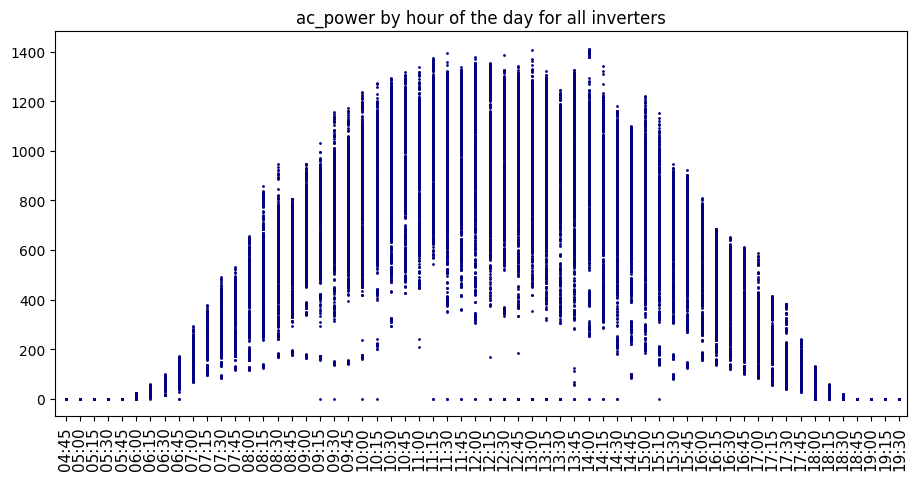

In [43]:
plot_all_ac_power(prod_p1)

In [44]:
date_time = pd.DatetimeIndex(prod_p1['date_time'].values)
date_time = date_time.minute/60 + date_time.hour
get_hr = lambda s : int(s.split(":")[0])+int(s.split(":")[1])/60
for s in ["05:45","06:00","18:30","18:45"]:
    answer = (prod_p1[date_time==get_hr(s)]['ac_power']>0).any()
    print(f"Is there any ac_power > 0 at {s} ?", answer)

Is there any ac_power > 0 at 05:45 ? False
Is there any ac_power > 0 at 06:00 ? True
Is there any ac_power > 0 at 18:30 ? True
Is there any ac_power > 0 at 18:45 ? False


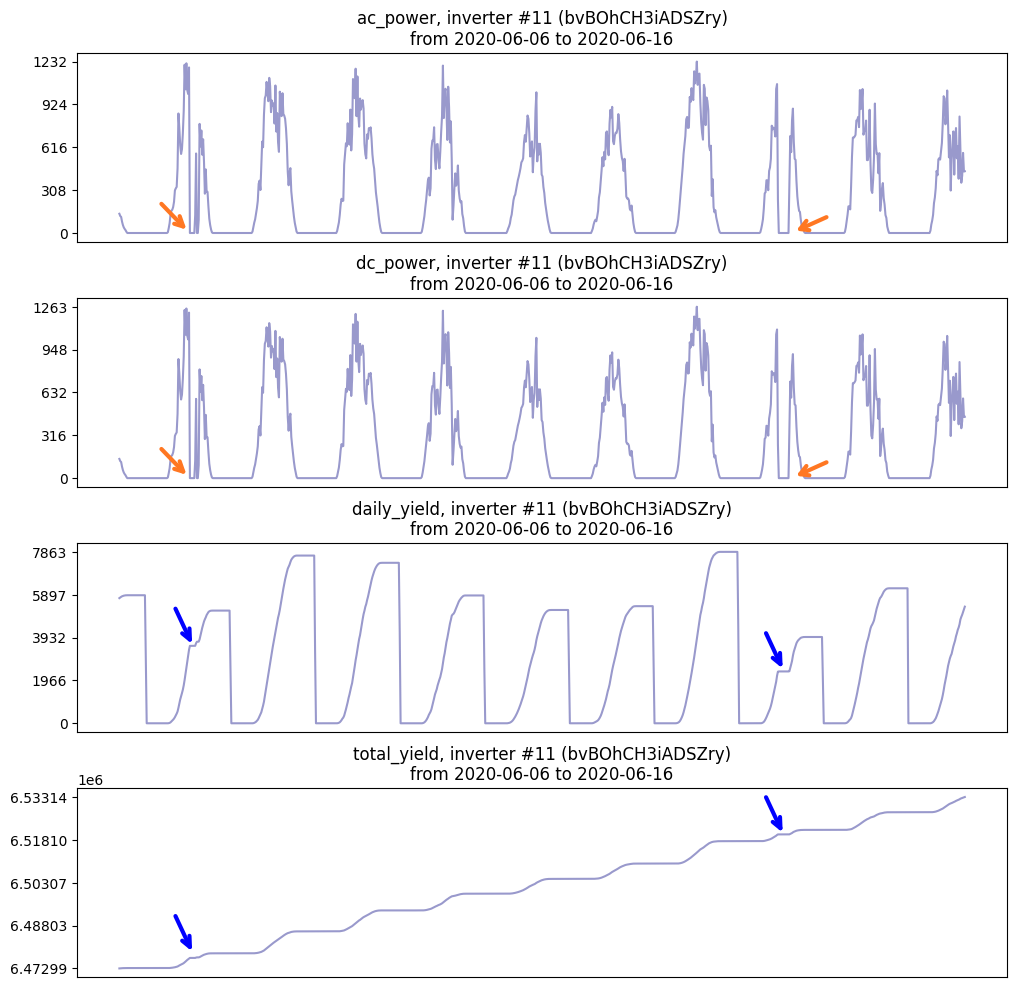

In [45]:
# visualize daily zeros

arrows =   dict({
            'saffron_arrows1':
            dict({'color':'#FF7722','angle':140,
                  'xy': [[[.12,.05]],
                         [[.12,.05]],
                         [],
                         []]}),
            'saffron_arrows2':
            dict({'color':'#FF7722','angle':20,
                  'xy': [[[.77,.05]],
                         [[.77,.05]],
                         [],
                         []]}),
            'green_arrows':
            dict({'color':'b','angle':120,
                  'xy':[[],
                        [],
                        [[.125,.45],[.76,.32]],
                        [[.125,.12],[.76,.75]]]})
                })
axes = plot_inverter(prod_p1,prod_p1_supp_data,11,start=2070,end=3030)
annotate_arrows(axes,arrows)

In [46]:

def find_missing(df):
    '''
    Function to find missing timestamps ad it's corresponding missing inverters
    find_missing(df: pandas.DataFrame)
    
    Returns pandas.DataFrame object containing the columns: 
        "date_time": missing Timestamps in "date_time" or
                     present Timestamps with missing inverters.
        "source_key" : list containing the "source_key" of the missing inverters
                     for a given Timestamp''
    Parameters
    ----------
    df: production data of solar plant'''
    
    missing_data = pd.DataFrame({})
    df = df.copy()
    
    date_time, dt_count = np.unique(df['date_time'].values,return_counts=True)
    dt_range  = pd.date_range(start=date_time[0],
                              end=date_time[-1],freq="15min")
    key = np.unique(df['source_key'].values)
    
    # find the datetimes that are not present in the datetimes of the df
    missing_data['date_time'] = dt_range[np.isin(dt_range,date_time)==False]
    source_key = [key for _ in range(len(missing_data['date_time']))]
    missing_data['source_key'] = source_key
    
    # find which inverters are missing in the datetimes that have < 22 invs.   
    dt_with_missing = date_time[dt_count < 22]
    df_missing = df[np.isin(df['date_time'].values,dt_with_missing)]
    for dt in dt_with_missing:
        present_key= df_missing[df_missing['date_time']==dt]['source_key'].values
        missing_key= key[np.isin(key,present_key)==False]
        missing_data = pd.concat([missing_data, pd.DataFrame.from_dict({'date_time':dt,
                            'source_key':missing_key})], ignore_index=True)
#         missing_data = missing_data.concat({'date_time':dt,
#                             'source_key':missing_key}, ignore_index=True)
    missing_data.sort_values(by=['date_time'],ignore_index=True,inplace=True)
    return missing_data

In [47]:
prod_p1_missing_data = find_missing(prod_p1)

In [48]:
def fill_night_missing(df, missing_data):
    '''fill nighttime missing values into the DataFrame with 0 for dc_power,
    ac_power and daily_yield and the total_yield missing is replaced with the
    nearest previous value'''
    
    cols = ['date_time','source_key','dc_power','ac_power',
            'daily_yield','total_yield'] 
    new_entries = pd.DataFrame([],columns=cols)
    night_ix = pd.DatetimeIndex(missing_data['date_time'].values)
    night_ix = night_ix.hour + night_ix.minute/60
    night_ix = (night_ix < 6.00) | (night_ix > 18.5)
    night_missing = missing_data[night_ix].explode('source_key')
    for key in np.unique(night_missing['source_key'].values):
        key_data = df[df['source_key']==key]
        
        #source_key missing during the night time = skmnt
        skmnt = night_missing[night_missing['source_key']==key]['date_time'].values
        skmnt = pd.DatetimeIndex(skmnt)
        index = np.searchsorted( key_data['date_time'].values,skmnt)
        nearest_total_yield = key_data.iloc[index-1]['total_yield']
        source_key  = np.full(len(index),key, dtype=np.int8)
        zeros = np.full(len(index),0.0, dtype=np.float32)
        total_yield = np.full(len(index),nearest_total_yield, dtype=np.float32)
        intermediate_df = pd.DataFrame( zip(skmnt, source_key,
                                            zeros, zeros, zeros, total_yield),
                                            columns = cols)
#         new_entries = new_entries.append(intermediate_df,ignore_index=True )
        new_entries = pd.concat([new_entries, intermediate_df], ignore_index=True)
    new_entries['source_key'] = np.array(new_entries['source_key' ].values, np.int8)
#     df = df.append(new_entries,ignore_index=True)
    df = pd.concat([df, new_entries], ignore_index=True)
    df.sort_values(by=['date_time'],ascending=True,ignore_index=True, inplace=True)
    return df

def std_daily_yield(df):
    'replace daily_yield with zero in hours between 18:30 and 6:00'
    
    date_time = pd.DatetimeIndex(df['date_time'].values)
    date_time = date_time.hour + date_time.minute/60
    ix = np.multiply((date_time <= 18.5), (date_time >= 6))
    df['daily_yield'] = np.multiply(df['daily_yield'].values,ix)
   
    return df

In [49]:
def remove_daytime_zeros(prod_df):
    date_time = pd.DatetimeIndex(prod_df['date_time'].values)
    date_time = date_time.hour + date_time.minute/60
    day_ix = (date_time > 6.5) & (date_time < 18)
    daytime_zeros = day_ix & (prod_df['ac_power'] <= 0)
    return prod_df[daytime_zeros == 0]

In [50]:
prod_p1 = remove_daytime_zeros(prod_p1)
prod_p1 = fill_night_missing(prod_p1, prod_p1_missing_data)
prod_p1 = std_daily_yield(prod_p1)

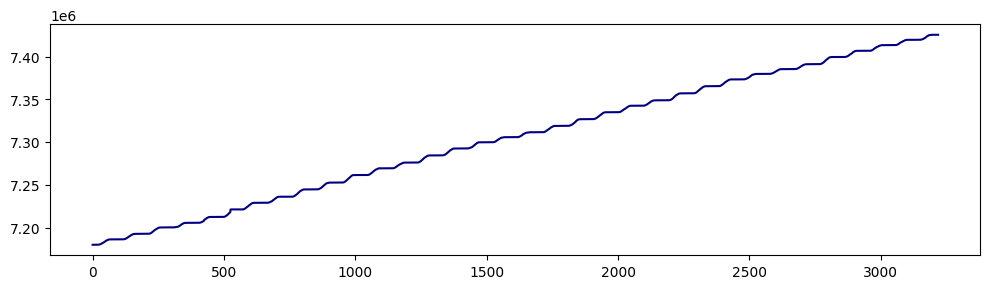

array([7179966., 7179966., 7179966., 7179966., 7179966., 7179966.])

In [51]:
# Therefore the first 4 values will be droped for this inverter

prod_p1.drop(index=prod_p1[prod_p1['source_key']==7].iloc[:4].index,inplace=True)
plt.figure(figsize=(12,3))
sample = prod_p1[prod_p1['source_key']==7]['total_yield'].values
plt.plot(range(len(sample)),sample)
plt.show()
sample[0:6]

In [52]:
p1ws = pd.read_csv('solar_data/Plant_1_Weather_Sensor_Data.csv')
p1ws.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

In [53]:
p1ws.info()
p1ws.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415     0.000000
25%    4135001.0            22.705182           21.090553     0.000000
50%    4135001.0            24.613814           24.618060     0.024653
75%    4135001.0            27.920532           41.307840     0.449588
max    4135001.0            35.252486           65.545714     1.221652

In [54]:
def optimize_formats_ws(df):
    if df.columns[0].isupper():
        initial_size = getsizeof(df)
        supp_data = dict({'plant_id':0,'sensors':[]})

        # drop "source_key" , store original "source_key" in separate variable
        supp_data['sensors'] = df['SOURCE_KEY'].values[0]
        df.drop(columns=['SOURCE_KEY'], inplace=True)

        # drop "plant_id" column and stores it's value in an external variable"
        supp_data['plant_id'] = df['PLANT_ID'].values[0]
        df.drop(columns=['PLANT_ID'], inplace=True)

        # change column names to lowercase, rename columns to shorter name
        df.rename(columns={'DATE_TIME':'date_time','AMBIENT_TEMPERATURE': 'ambient_t',
                           'MODULE_TEMPERATURE':'module_t', 'IRRADIATION':'irradiation'},
                 inplace=True)

        # change 'date_time' from string to pd.Timestamp
        df['date_time'] = pd.DatetimeIndex(df['date_time'].values, dayfirst=True)
        final_size = getsizeof(df) + getsizeof(supp_data)
        print(f'Initial size: {initial_size/1e6:.2f} Mb')
        print(f'Final size:    {final_size/1e6:.2f} Mb')
        print(f"Memory footprint reduction: {(initial_size - final_size)/initial_size*100:.2f}%")
    else:
        raise ValueError("Formats allready optimized !")
    return df, supp_data

In [55]:
p1ws, p1ws_supp_data = optimize_formats_ws(p1ws)

Initial size: 0.57 Mb
Final size:    0.10 Mb
Memory footprint reduction: 82.17%


In [56]:
p1ws.head(3)

date_time  ambient_t   module_t  irradiation
0 2020-05-15 00:00:00  25.184316  22.857507          0.0
1 2020-05-15 00:15:00  25.084589  22.761668          0.0
2 2020-05-15 00:30:00  24.935753  22.592306          0.0

In [57]:
p1ws_supp_data['sensors'],p1ws_supp_data['plant_id']

('HmiyD2TTLFNqkNe', 4135001)

In [58]:
prod_p2 = pd.read_csv('solar_data/Plant_2_Generation_Data.csv')
prod_p2[prod_p2['DC_POWER']>0].head()

DATE_TIME  PLANT_ID       SOURCE_KEY   DC_POWER   AC_POWER  \
528  2020-05-15 06:00:00   4136001  4UPUqMRk7TRMgml  15.406667  14.860000   
529  2020-05-15 06:00:00   4136001  81aHJ1q11NBPMrL  14.773333  14.246667   
530  2020-05-15 06:00:00   4136001  9kRcWv60rDACzjR  15.380000  14.840000   
531  2020-05-15 06:00:00   4136001  Et9kgGMDl729KT4  14.973333  14.440000   
532  2020-05-15 06:00:00   4136001  IQ2d7wF4YD8zU1Q  15.160000  14.633333   

     DAILY_YIELD   TOTAL_YIELD  
528     0.800000  2.429012e+06  
529     0.733333  1.215279e+09  
530     1.866667  2.247720e+09  
531     1.000000  1.704251e+06  
532     0.733333  1.994153e+07

In [59]:
prod_p2[prod_p2['DC_POWER']>0].tail()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
67253  2020-06-17 18:45:00   4136001  q49J1IKaHRwDQnt  3.771429  3.635714   
67254  2020-06-17 18:45:00   4136001  rrq4fwE8jgrTyWY  2.857143  2.757143   
67255  2020-06-17 18:45:00   4136001  vOuJvMaM2sgwLmb  3.780000  3.633333   
67256  2020-06-17 18:45:00   4136001  xMbIugepa2P7lBB  3.580000  3.453333   
67257  2020-06-17 18:45:00   4136001  xoJJ8DcxJEcupym  3.907143  3.757143   

       DAILY_YIELD   TOTAL_YIELD  
67253  4156.857143  5.207579e+05  
67254  3930.714286  1.211314e+08  
67255  4321.800000  2.427691e+06  
67256  4217.733333  1.068964e+08  
67257  4315.642857  2.093357e+08

In [60]:
prod_p2, prod_p2_supp_data = optimize_formats(prod_p2)

Initial size: 12.73 Mb
Final size:    2.78 Mb
Memory footprint reduction: 78.19%


/var/folders/12/3t8j_m251x73pvd20fmcj4_c0000gq/T/ipykernel_11920/23428447.py:23: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['date_time'] =pd.to_datetime(df['date_time'].values, dayfirst=True)


In [61]:
prod_p2_missing_data = find_missing(prod_p2)

In [62]:
# Fill the night-missing time-stamps with zeros for plant #2
prod_p2 = fill_night_missing(prod_p2, prod_p2_missing_data)

# Actualize the missing values after night-missing are filled
prod_p2_missing_data = find_missing(prod_p2)

# Standardize daily_yield to be zero when there is no longer production
prod_p2 = std_daily_yield(prod_p2)

# Remove zero or negative outliers from daytime
prod_p2 = remove_daytime_zeros(prod_p2)

# Actualize the missing values after night-missing are filled
prod_p2_missing_data = find_missing(prod_p2)

In [63]:
def filter_total_yield_anomalies(prod_df, variable):
    new_ix = [] #list of the indexes without anomalies
    for key in np.unique(prod_df['source_key'].values):
        key_df = prod_df[prod_df['source_key']==key]
        field = key_df[variable].values
        if variable == 'daily_yield':
                field = np.cumsum(field)
        filter_ix = (field[1:]-field[0:-1]) < 0
        present_outliers = np.any(filter_ix == True)
        while present_outliers:
            dt = pd.DatetimeIndex(key_df['date_time'].values)
            field = key_df[variable].values
            if variable == 'daily_yield':
                field = np.cumsum(field)
            filter_ix = np.hstack([[False],(field[1:]-field[0:-1]) < 0])
            key_df = key_df[filter_ix == False]
            field = key_df[variable].values
            filter_ix = np.hstack([(field[1:]-field[0:-1]) < 0,[False]])
            present_outliers = np.any(filter_ix == True)
        new_ix += list(key_df.index)
    new_ix = list(np.sort(new_ix))
    init = len(prod_df.index)
    end  = len(new_ix)
    print(f'Initial Dataframe Length: {init}')
    print(f'Final Dataframe length: {end}')
    print(f'filtered out records: {init-end} ({(init-end)/init*100:.1f}%)')
    return prod_df.loc[new_ix,:]

In [64]:
prod_p2 = filter_total_yield_anomalies(prod_p2,'total_yield')
prod_p1 = filter_total_yield_anomalies(prod_p1,'total_yield')

Initial Dataframe Length: 65739
Final Dataframe length: 64098
filtered out records: 1641 (2.5%)
Initial Dataframe Length: 70874
Final Dataframe length: 70823
filtered out records: 51 (0.1%)


In [65]:
def filter_daily_yield_anomalies(prod_df):
    df = prod_df.copy()
    initial_size = len(df)
    
    def get_filter_values(sub_df):
        dt = pd.DatetimeIndex(sub_df['date_time'].values)
        daily_yield = sub_df['daily_yield'].values
        delta = np.hstack([[0],daily_yield[1:]-daily_yield[0:-1]])
        # 
        periods = np.hstack([ [1], (dt[1:] - dt[0:-1]).seconds/900])
        delta = delta/periods
        return (delta < 0) & (daily_yield != 0)
        
    for key in np.unique(df['source_key'].values):
        key_df = df[df['source_key'] == key]
        yield_filter = get_filter_values(key_df)
        ix_to_drop = []
        while np.any(yield_filter):
            key_ix = key_df.index
            bad_ix = [ key_ix[key_ix < ix][-1] for ix in  key_ix[yield_filter]]
            ix_to_drop += bad_ix
            key_df = key_df.drop(bad_ix)
            yield_filter = get_filter_values(key_df)
        df.drop(ix_to_drop, inplace=True)
    print(f"Dataset reduction: {(initial_size-len(df))/initial_size*100:0.2f}%")
    return df

In [66]:
prod_p2 = filter_daily_yield_anomalies(prod_p2)
prod_p1 = filter_daily_yield_anomalies(prod_p1)

Dataset reduction: 0.72%
Dataset reduction: 0.08%


In [67]:
prod_p2_missing_data = find_missing(prod_p2)
prod_p2 = fill_night_missing(prod_p2, prod_p2_missing_data)
prod_p2_missing_data = find_missing(prod_p2)

prod_p1_missing_data = find_missing(prod_p1)
prod_p1 = fill_night_missing(prod_p1, prod_p1_missing_data)
prod_p1_missing_data = find_missing(prod_p1)

In [68]:
p2ws = pd.read_csv('solar_data/Plant_2_Weather_Sensor_Data.csv')

p2ws, p2ws_supp_data = optimize_formats_ws(p2ws)

Initial size: 0.59 Mb
Final size:    0.10 Mb
Memory footprint reduction: 82.17%


In [69]:
# visualization of the relationship between power production, temperature, and irradiation

def power_vs_irr_vs_temp(sensor_df,prod_df,key):
    key_df = pd.merge(left=sensor_df,right=prod_df,
                      how='inner',on='date_time')
    key_df = key_df[key_df['source_key']==key]
    date_time = pd.DatetimeIndex(key_df['date_time'].values)
    date_time = date_time.hour + date_time.minute/60
    day_ix = (date_time >= 6) & (date_time <= 18.5)
    key_df = key_df[day_ix]
    key_df.drop(columns=key_df.columns.difference(['date_time','ambient_t',
                    'module_t','irradiation','ac_power']),inplace=True)
    key_df = key_df.sort_values(by=['irradiation'])
    fig = plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    ax = plt.gca()
    color_index = np.unique(key_df['irradiation'].values/(1.1*key_df['irradiation'].max())+0.1)
    colors = plt.cm.Greens(X=color_index)[-1::-1]
    ax.scatter(key_df['ambient_t'],key_df['ac_power'],color= colors,alpha=1)
    ax.set_title("AC Power Vs Ambient Temperature Plant #1")
    ax.set_xlabel("Ambient Temperature")
    ax.set_ylabel("AC Power (Kw)",labelpad=30)
    ax.yaxis.get_label().set_rotation(-90)
    plt.colorbar( plt.cm.ScalarMappable(norm=Normalize(vmax=0.0,vmin=1.2),
                        cmap='Greens_r'), ticks=np.arange(0,1.21,0.2),label='Irradiation (W / $m^2$)')

    fig.add_subplot(1,2,2,projection='3d')
    ax = plt.gca()
    ax.scatter(key_df['ambient_t'],key_df['irradiation'].values,key_df['ac_power'])
    ax.view_init(elev=30,azim=-140)
    ax.set_xlabel('Ambient Temperature (ºC)')
    ax.set_ylabel('Irradiation (W / $m^2$)')
    ax.set_zlabel('AC Power (Kw)')
    ax.zaxis.get_label().set_rotation(1)
    ax.set_title('AC Power Vs abient_t & Irradiation Plant #1 inv #1 ')
    plt.show()

/var/folders/12/3t8j_m251x73pvd20fmcj4_c0000gq/T/ipykernel_11920/231314049.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar( plt.cm.ScalarMappable(norm=Normalize(vmax=0.0,vmin=1.2),


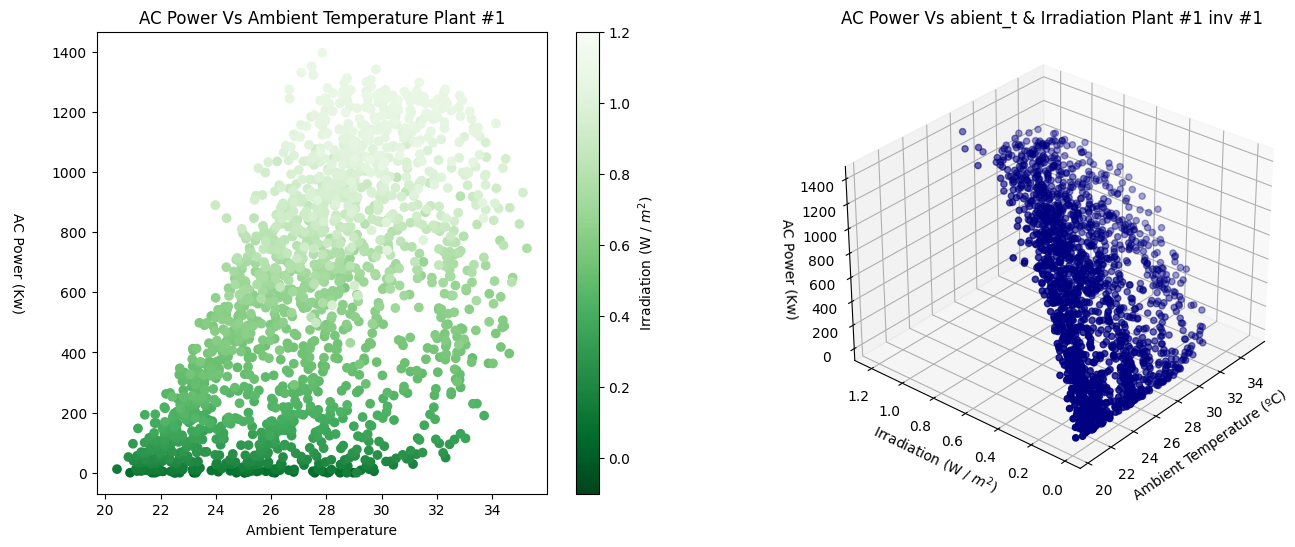

In [70]:
power_vs_irr_vs_temp(p1ws,prod_p1,21)

In [71]:
def create_new_features(prod_df,sensor_df,key_n):
    df = prod_df.copy()[prod_df['source_key']==key_n]
    df = pd.merge(left=sensor_df,right=df,how='inner',on='date_time')
    hours = pd.DatetimeIndex(df['date_time'].values)
    hours = hours.hour + hours.minute/60
    df = df[(hours >= 6) & (hours <= 18.5)]
    df.rename(columns={'irradiation':'Gir','ac_power':'pac', 
                       'ambient_t': 'Ta'}, inplace=True)
    df = df[['date_time','source_key','Gir','Ta','pac']]
    df['hours'] = hours[(hours >= 6) & (hours <= 18.5)]
    df['Gir^3'] = np.power(df['Gir'],3)
    df['Gir^2'] = np.power(df['Gir'],2)
    df['Ta^2']  = np.power(df['Ta'],2)
    df['Gir^2.Ta'] = np.multiply(df['Gir^2'],df['Ta'])
    df['Gir.Ta^2'] = np.multiply(df['Gir'],df['Ta^2'])
    df['Gir.Ta'] =  np.multiply(df['Gir'],df['Ta'])
    df = df[['date_time','hours','Gir^3','Gir^2','Gir^2.Ta','Gir.Ta^2',
                     'Gir.Ta','Gir','pac']]
                     
    return df

In [72]:
prod_p1_new_data = create_new_features(prod_p1,p1ws,1)

In [73]:
def split_data(df):
    X = df.drop(columns=['hours','pac'])
    pac = df['pac'].values
    train_size = int(0.8*len(pac))
    X_train ,  X_test  =   X.iloc[:train_size,:],   X.iloc[train_size:,:];
    pac_train, pac_test= pac[:train_size],   pac[train_size:];
    #filter out pac=0
    ix = pac_test > 0
    pac_test = pac_test[ix]
    X_test = X_test[ix]
    return X_train, X_test, pac_train, pac_test;


In [74]:
X_train, X_test, pac_train, pac_test = split_data(prod_p1_new_data)

In [75]:
def find_best_regressor(X_train, pac_train):
    X_train = X_train.drop(columns=['date_time']).values
    models = [
            ('Linear', LinearRegression(fit_intercept =False, n_jobs=-1)),
            ('Ridge', Ridge(fit_intercept =False, solver= 'lsqr', random_state=1973)),
            ('DTree', DecisionTreeRegressor(random_state=1973)),
            ('RForest', RandomForestRegressor(random_state=1973, n_jobs=-1)),
            ('KNReg', KNeighborsRegressor(n_neighbors=5,n_jobs=-1)),
            ]
    scores = dict({})
    ts_split = TimeSeriesSplit(n_splits=6)
    for name,model in models:
        folds = ts_split.split(X_train, pac_train)
        regressor = clone(model)
        cv_scores = cross_validate(regressor, X_train, pac_train,
                                   cv=folds, scoring='neg_mean_squared_error')
        scores[name.rjust(10," ")] = np.mean(cv_scores['test_score'])
    scores = pd.DataFrame(scores.items(),columns=['regressor','Neg_MSE'])
    scores = scores.sort_values(by=['Neg_MSE'],ascending=False,ignore_index=True)
    return scores

In [76]:
find_best_regressor(X_train, pac_train )

regressor      Neg_MSE
0      Linear -3296.166947
1       Ridge -3329.269946
2     RForest -4067.455598
3       DTree -6769.461600
4       KNReg -9986.437094

In [77]:
def construct_models(prod_df,sensor_df):
    models = []
    predictions_df = pd.DataFrame({})
    rmse = []
    def get_final_model(X, X_t, pac, pac_t):
        model = LinearRegression()
        model.fit(X, pac)
        pac_pred = model.predict(X_t).flatten()
        return model, pac_pred, mean_squared_error(pac_t, pac_pred)
    
    for key in np.unique(prod_df['source_key'].values):
        new_features = create_new_features(prod_df,sensor_df,key)
        X_train, X_test, pac_train, pac_test = split_data(new_features)
        date_time = X_test['date_time'].values
        X_train = X_train.drop(columns=['date_time']).values
        X_test  = X_test.drop(columns=['date_time']).values
        model, pac_predicted, mse = get_final_model(X_train, X_test,
                                                    pac_train, pac_test)
        models += [model]
        rmse += [np.sqrt(mse)]
        r2score = int(100*r2_score(pac_test,pac_predicted))
        residuals = (pac_predicted-pac_test)
        str1 = f'#{str(key).rjust(2)}   --->   '
        str2 = f' rmse: {int(np.sqrt(mse))}'
        str3 = f',      R^2 (Determination coeff.): {r2score}%'
        print( str1 + str2 +str3)
        predictions_df = pd.concat([predictions_df, pd.DataFrame.from_dict({
              'date_time':date_time,'source_key':np.full(len(residuals),key),
              'pac':pac_test, 'pac_predicted':pac_predicted,
              'residuals':residuals})])
    predictions_df.sort_values(by='date_time', ignore_index=True, inplace=True)
    return models, predictions_df, rmse

In [78]:
( plant1_models, plant1_predictions,
plant1_rmses ) = construct_models(prod_p1, p1ws)

# 0   --->    rmse: 66,      R^2 (Determination coeff.): 95%
# 1   --->    rmse: 41,      R^2 (Determination coeff.): 98%
# 2   --->    rmse: 49,      R^2 (Determination coeff.): 97%
# 3   --->    rmse: 42,      R^2 (Determination coeff.): 98%
# 4   --->    rmse: 42,      R^2 (Determination coeff.): 98%
# 5   --->    rmse: 45,      R^2 (Determination coeff.): 98%
# 6   --->    rmse: 53,      R^2 (Determination coeff.): 97%
# 7   --->    rmse: 40,      R^2 (Determination coeff.): 98%
# 8   --->    rmse: 40,      R^2 (Determination coeff.): 98%
# 9   --->    rmse: 41,      R^2 (Determination coeff.): 98%
#10   --->    rmse: 45,      R^2 (Determination coeff.): 98%
#11   --->    rmse: 64,      R^2 (Determination coeff.): 95%
#12   --->    rmse: 41,      R^2 (Determination coeff.): 98%
#13   --->    rmse: 36,      R^2 (Determination coeff.): 98%
#14   --->    rmse: 46,      R^2 (Determination coeff.): 98%
#15   --->    rmse: 42,      R^2 (Determination coeff.): 98%
#16   --->    rmse: 40, 

In [79]:
# plot AC_Power test-set and predicted AC_Power for this set.
def plot_sample(predictions_df,key):
    key_df = predictions_df[predictions_df['source_key']==key]
    plt.figure(figsize=(16,3))
    plt.plot(key_df['date_time'],key_df['pac'],label='Pac',alpha=0.7)
    plt.plot(key_df['date_time'],key_df['pac_predicted'], alpha=0.7,label="prediction")
    plt.legend(loc='best')
    plt.title(f"prediction and actual AC_POWER for inverter #{key}")
    plt.show()

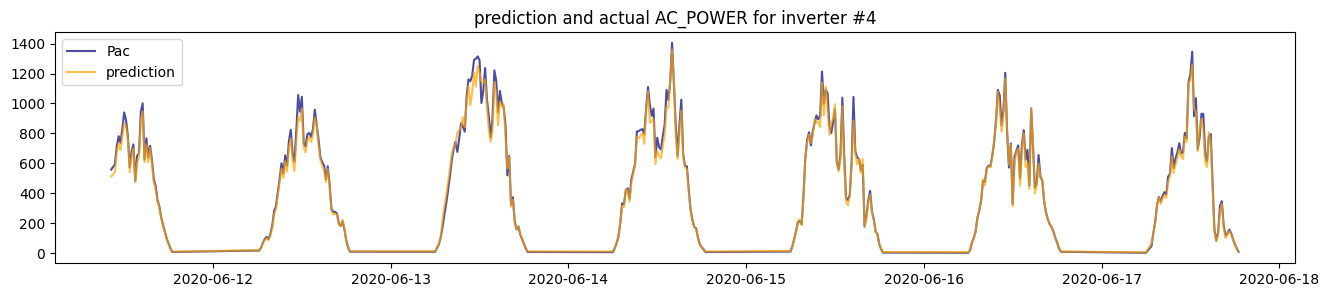

In [80]:
plot_sample(plant1_predictions, 4)

In [81]:
def plot_all_residuals(prediction_df,figsize=(16,16),set_title=True):
    keys = np.unique(prediction_df['source_key'].values)
    cols = 4
    rows = len(keys)//cols + 1*(len(keys)>0)
    if rows == 1:
        cols = len(keys)
    fig ,axes = plt.subplots(nrows=rows,ncols=cols,figsize=figsize)
    if type(axes) == np.ndarray:
        axes = axes.ravel()
    else:
        axes = [axes]
    for key,ax in zip(keys, axes[:len(keys)]):
        key_df =  prediction_df[prediction_df['source_key']==key]
        residuals = key_df['residuals'].values
        plt.subplot(rows,cols,key+1)
        ax.hist(residuals, bins=50, density=True,color='navy',
                label = 'Residuals')
        if set_title == True:
            title = f"Residuals distribution for Inv #{key}"
            ax.set_title(title)
        xmin,xmax = ax.get_xlim()
        ymin,ymax = ax.get_ylim()
        xticks=np.linspace(xmin,xmax,5)
        labels=[f'{int(x)}' for x in xticks]
        plt.xticks(ticks=xticks,labels=labels)
        # make room for the legends
        plt.gca().set_xlim((xmin,xmax + (xmax-xmin)*0.65))
        plt.vlines(xmax,ymin,ymax,color='k')
        plt.gca().set_ylim((ymin,ymax))
        
        #draw legends
        n = len(residuals)
        mu = residuals.mean()
        m2 = np.sum(np.power(residuals-mu,2))/n
        m3 = np.sum(np.power(residuals-mu,3))/n
        m4 = np.sum(np.power(residuals-mu,4))/n
        mu = residuals.mean()
        sigma  = residuals.std()
        kurt = m4/(m2**2)
        skew = m3/(m2**1.5)
        rmse = int(np.sqrt(np.sum(np.power(residuals,2))/n))
        r2score = int(100*r2_score(key_df['pac'],key_df['pac_predicted']))
        legends = [ 
            f'     $\mu$ :' + f'{mu:0.1f}'.rjust(6," "),
            f'     $\sigma$ :' +  f'{sigma:0.1f}'.rjust(6," "),
            f'   kurt:' + f'{kurt:0.1f}'.rjust(6," "),
            f'skew:' + f'{skew:0.1f}'.rjust(6," "),
            f' rmse:' + f'{rmse}'.rjust(6," "),
            f'  R^2 :' + f'{r2score}%'.rjust(6," "),]
        for i,legend in enumerate(legends):
            plt.text(xmax + (xmax-xmin)*0.05,
                     ymax-(ymax-ymin)*(0.11*(i+1)), legend,color='navy')
            
    # do not show empty plots
    for i in range(rows*cols)[len(keys):]:
        axes[i].axis('off')
    fig.subplots_adjust(hspace=0.5)

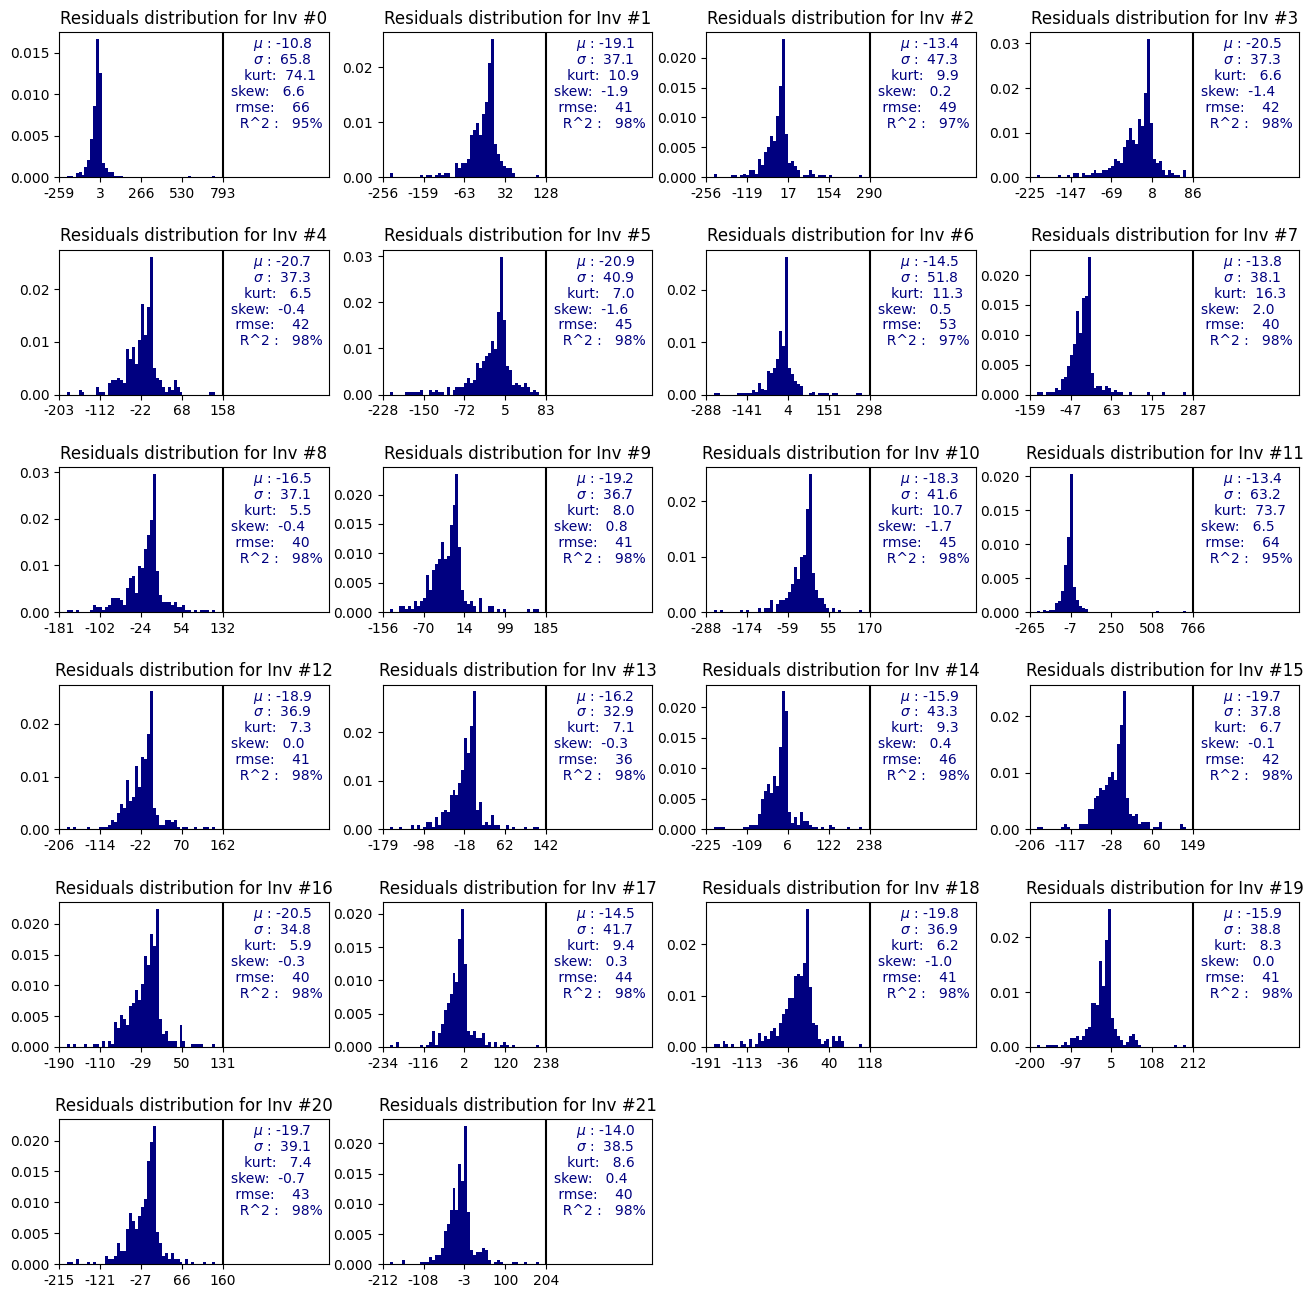

In [82]:
plot_all_residuals(plant1_predictions)

/var/folders/12/3t8j_m251x73pvd20fmcj4_c0000gq/T/ipykernel_11920/231314049.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar( plt.cm.ScalarMappable(norm=Normalize(vmax=0.0,vmin=1.2),


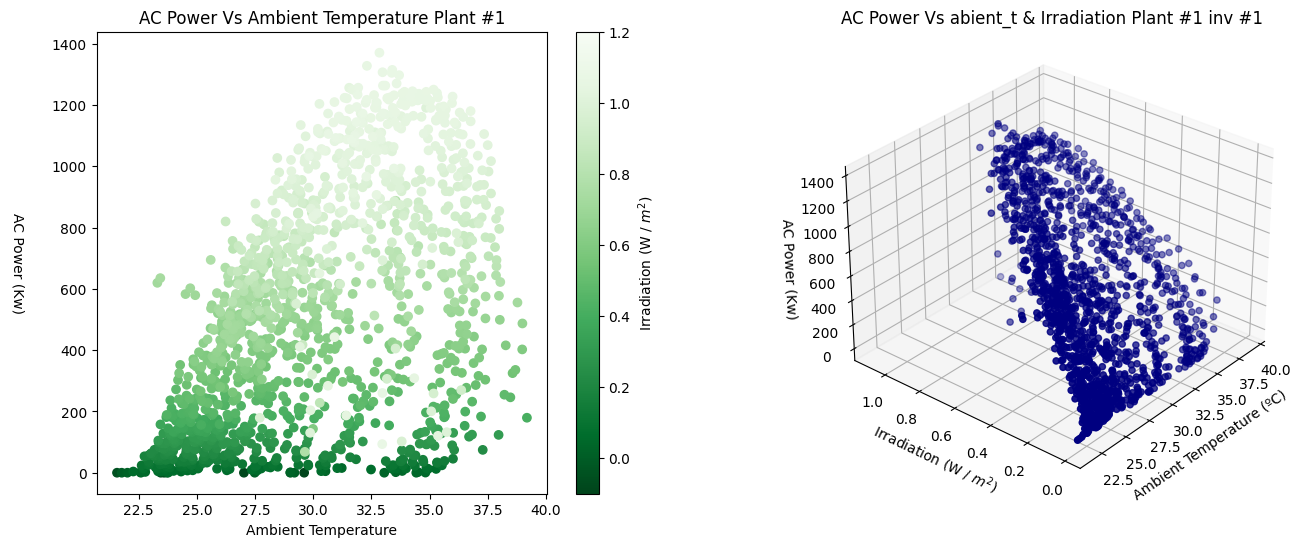

In [83]:
# for plant 2

power_vs_irr_vs_temp(p2ws,prod_p2,21)

In [84]:
prod_p2_new_data = create_new_features(prod_p2, p2ws, 1)

In [85]:
( plant2_models, plant2_predictions,
plant2_rmses ) = construct_models(prod_p2, p2ws)

# 0   --->    rmse: 127,      R^2 (Determination coeff.): 78%
# 1   --->    rmse: 58,      R^2 (Determination coeff.): 96%
# 2   --->    rmse: 56,      R^2 (Determination coeff.): 96%
# 3   --->    rmse: 107,      R^2 (Determination coeff.): 80%
# 4   --->    rmse: 84,      R^2 (Determination coeff.): 92%
# 5   --->    rmse: 66,      R^2 (Determination coeff.): 95%
# 6   --->    rmse: 42,      R^2 (Determination coeff.): 97%
# 7   --->    rmse: 91,      R^2 (Determination coeff.): 85%
# 8   --->    rmse: 86,      R^2 (Determination coeff.): 91%
# 9   --->    rmse: 91,      R^2 (Determination coeff.): 90%
#10   --->    rmse: 111,      R^2 (Determination coeff.): 77%
#11   --->    rmse: 106,      R^2 (Determination coeff.): 76%
#12   --->    rmse: 87,      R^2 (Determination coeff.): 87%
#13   --->    rmse: 56,      R^2 (Determination coeff.): 97%
#14   --->    rmse: 91,      R^2 (Determination coeff.): 91%
#15   --->    rmse: 88,      R^2 (Determination coeff.): 87%
#16   --->    rmse: 

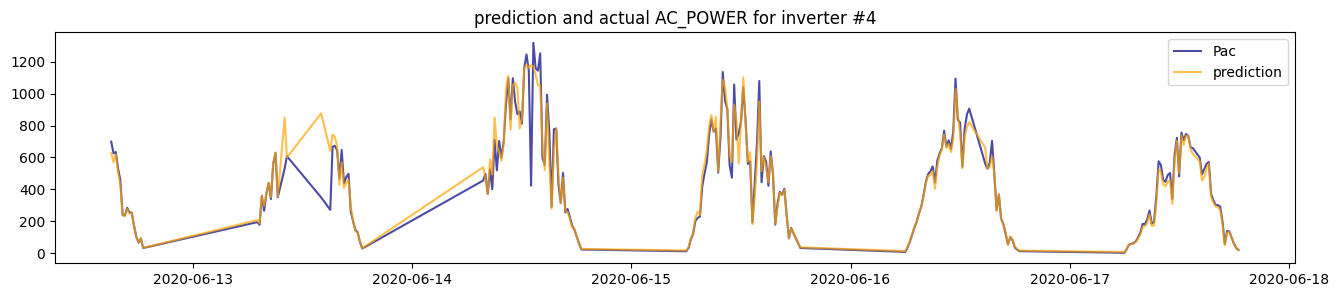

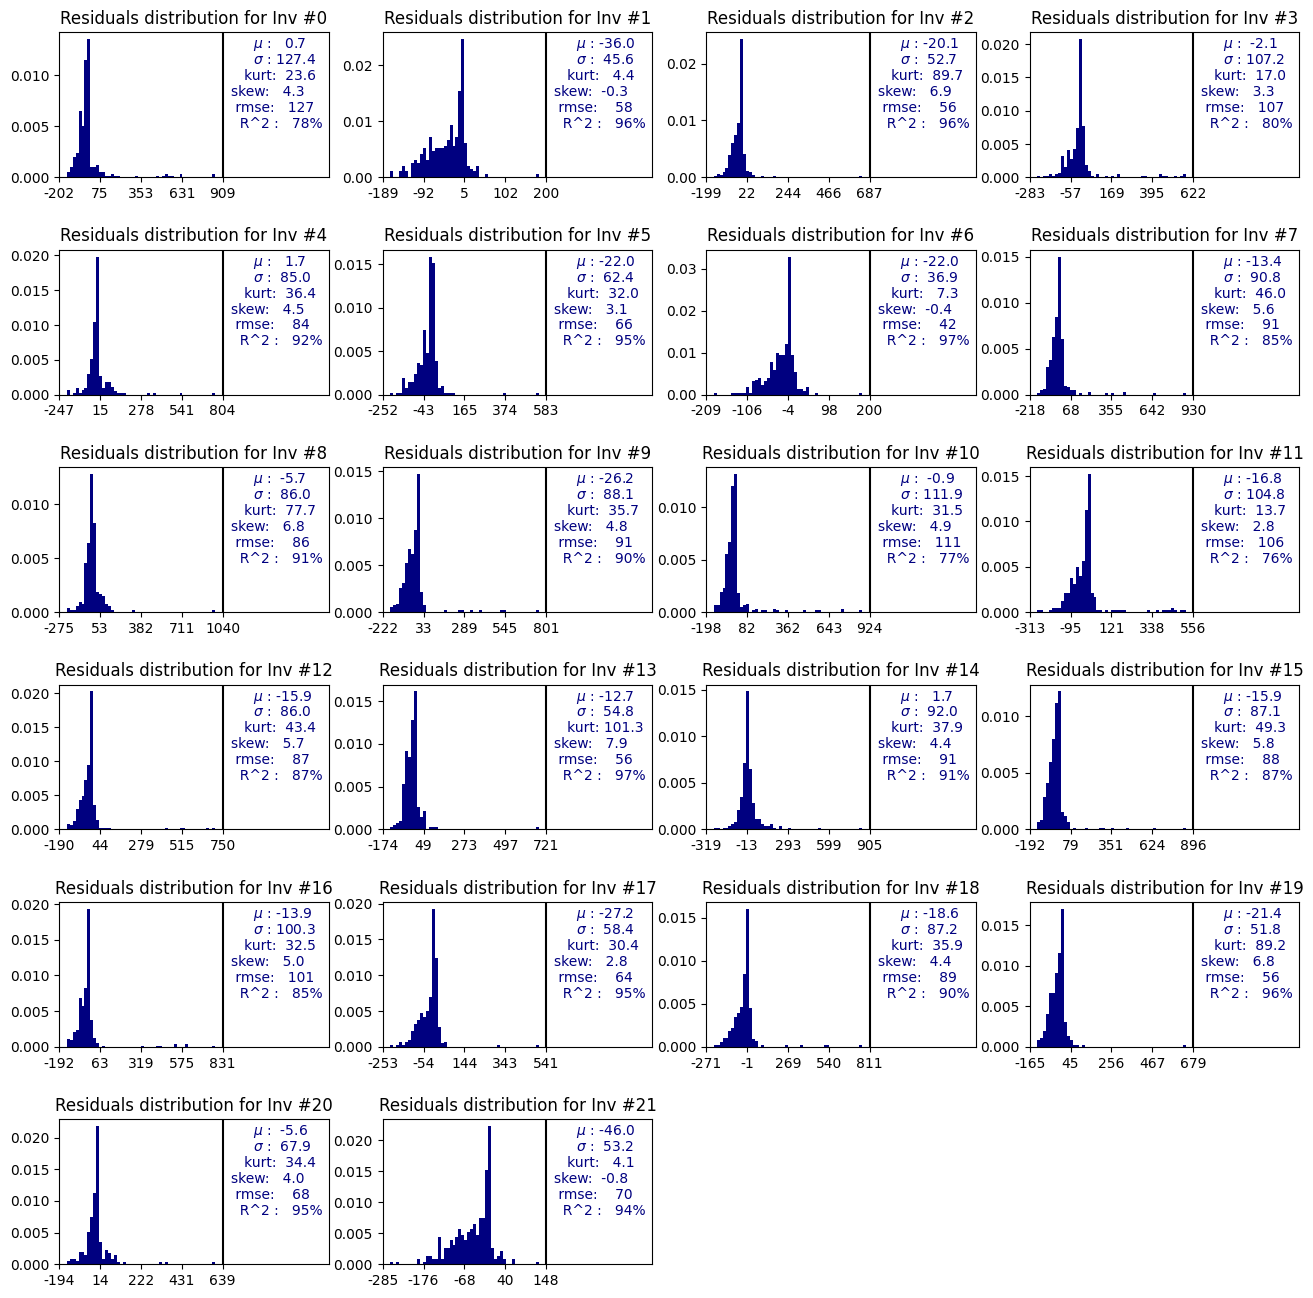

In [86]:
plot_sample(plant2_predictions,4)
plot_all_residuals(plant2_predictions)

# Business Plan

### Executive Summary:

 

Our company offers an innovative AI-powered chatbot solution designed to optimize energy usage, facilitate decarbonization efforts, and enhance sustainability. We target electrical companies, including prominent players like PGNE and their international counterparts, as our primary customers. Additionally, defense companies and the airplane industry, which are transitioning to alternate energy resources like hydrogen power, present potential customer segments.

 

Our solution leverages predictive models, optimization algorithms, and real-time data analysis to provide actionable insights and recommendations. By accurately predicting energy demand, optimizing renewable energy utilization, suggesting optimal locations for EV charging stations, and addressing the need for longer-term backup capacity, our solution enables customers to reduce carbon emissions, improve energy efficiency, and meet sustainability goals.

 

The market for energy optimization and decarbonization solutions is rapidly growing, driven by the increasing global focus on mitigating climate change and transitioning to clean energy. Electrical companies, defense organizations, and the airplane industry are actively seeking innovative technologies to enhance their energy efficiency and reduce their environmental impact. Our solution caters to these market segments by offering a comprehensive AI-powered platform that aligns with their sustainability objectives.

 

### Market Analysis:

 

The market for energy optimization and decarbonization solutions is experiencing significant growth due to rising environmental concerns and increased regulatory pressures. Electrical companies are under increasing pressure to reduce their carbon footprint and transition to clean energy sources. Defense organizations and the airplane industry are also embracing sustainability initiatives and seeking solutions that optimize their energy usage while transitioning to alternative energy resources.

 

Our solution aligns perfectly with the market needs as it offers a comprehensive platform that addresses the specific challenges faced by these industries. By providing accurate predictions of energy demand, optimizing renewable energy utilization, and suggesting optimal EV charging station locations, our solution enables customers to make informed decisions that reduce emissions, improve efficiency, and align with their sustainability goals.

 

### Product Differentiation:

 

Our solution stands out from existing offerings through its advanced AI capabilities, customization options, and real-time optimization features. The chatbot's integration with predictive models and optimization algorithms provides valuable insights tailored to customers' specific needs. The ability to predict energy demand, suggest optimal renewable energy utilization, optimize EV charging station locations, and address backup capacity requirements sets us apart from competitors. Moreover, our solution's user-friendly interface and interactive nature enhance customer experience and ease of adoption.

 

The customization options offered by our solution allow customers to tailor the chatbot's recommendations and insights to their specific requirements. This flexibility ensures that the solution can adapt to different energy infrastructures and unique operational demands, making it a highly desirable choice for electrical companies, defense organizations, and the airplane industry.

 

### Customer Acquisition and Benefits:

 

Our strategy for customer acquisition will focus on targeted marketing campaigns, partnerships with industry leaders, and demonstrations of our solution's effectiveness. Electrical companies will be motivated to adopt our solution to achieve their decarbonization goals, enhance energy efficiency, and reduce operational costs. Defense companies and the airplane industry can benefit from our solution's ability to optimize their transition to alternate energy resources like hydrogen power. Our product's desirability lies in its ability to offer real-time, data-driven recommendations that optimize energy usage, improve sustainability, and ensure regulatory compliance.

 

Customers adopting our solution can expect numerous benefits. Firstly, they will experience improved energy efficiency, leading to reduced operational costs and increased profitability. Secondly, our solution helps customers meet their sustainability goals by reducing carbon emissions and reliance on fossil fuels. Thirdly, the real-time optimization capabilities of our solution ensure that customers can adapt quickly to changing energy demand patterns, resulting in improved grid stability and flexibility.

 

### Revenue Model:

 

Our revenue model will be based on a subscription-based pricing structure, where customers pay a recurring fee to access and utilize our AI-powered chatbot and optimization features. The subscription fee will be tailored to the size and requirements of each customer, ensuring scalability and affordability. Additional revenue streams may include customization services, data analytics insights, and value-added features.

 

To ensure customer satisfaction and long-term relationships, we will provide ongoing customer support and updates, ensuring that our solution continuously evolves to meet the changing needs of our customers.

 

### Financial Projections:

 

Our financial projections are based on anticipated customer acquisition rates, average subscription fees, and cost analysis. We expect a steady increase in revenue as we acquire customers and expand our market presence. Investments will be allocated to research and development, marketing, talent acquisition, and infrastructure development. Detailed financial projections, including revenue, expenses, and profitability, will be provided in the attached financial statement.

 

In conclusion, our AI-powered energy optimization solution holds significant viability, feasibility, and desirability in the market. The combination of advanced AI capabilities, real-time optimization, and customization options positions us as a leader in the energy decarbonization landscape. By targeting electrical companies, defense organizations, and the airplane industry, we are poised to capture a significant market share and contribute to global sustainability goals. With a strong business plan, solid financial projections, and a focus on customer satisfaction, our company is well-positioned for success in the rapidly evolving energy optimization market.



# Data Privacy and Ethics
Data ethics and privacy are of paramount importance in our AI-powered energy optimization solution. We recognize that the datasets we use, such as the energy consumption data from PJM and the solar plant data from India, contain sensitive information and must be handled with utmost care.

 

To ensure data ethics, we strictly adhere to privacy regulations and industry best practices. We anonymize and encrypt personal data, removing any personally identifiable information from the datasets. We also implement strong security measures to protect the data from unauthorized access or breaches.

 

Furthermore, we obtain proper consent and permissions when collecting and using the data. We ensure transparency by clearly communicating the purpose of data collection and obtaining informed consent from individuals or organizations involved. Our data collection and usage processes comply with applicable data protection laws and regulations, safeguarding the privacy of individuals and organizations involved in the datasets.

 

We also prioritize data minimization and data retention policies. We only collect and retain the data necessary for the functioning of our solution, and we promptly discard any unnecessary or outdated information. This approach helps reduce the risk of data misuse and ensures compliance with data protection principles.

 

In summary, data ethics and privacy are foundational principles in our solution. We are committed to handling data responsibly, complying with privacy regulations, and implementing robust security measures to protect the privacy and confidentiality of the datasets we use. By upholding these principles, we maintain the trust of our customers and prioritize the ethical use of data in our AI-powered energy optimization solution.

# Challenges
Another challenge we faced was finding datasets that encompassed all the necessary variables and factors required for our solution. The availability and accessibility of relevant and comprehensive datasets can be a challenge, especially when aiming to incorporate various parameters such as energy consumption patterns, renewable energy availability, and geographical data. We dedicated substantial effort to sourcing and curating datasets that would provide the foundation for accurate predictions and optimizations.

 

Additionally, we encountered a hurdle in obtaining access to an API that would provide us with the real-time data needed to identify optimal EV charging station positions. Without direct access to the API, we had to rely on alternative approaches and approximations to generate recommendations for optimal charging station locations. Despite this limitation, we leveraged available data and applied our expertise to design an AI algorithm that optimized EV charging station placements based on factors like traffic patterns and population density.

 

Despite these challenges, we persevered and developed a viable solution that addresses energy optimization, decarbonization, and sustainability. Our commitment to problem-solving, creativity, and resourcefulness allowed us to overcome these obstacles and deliver a valuable solution during the hackathon.



# Future Directions
In terms of future directions and next steps for the project, there are several key areas to focus on. First, implementing the chatbot and conducting benchmarking against other AI models like Claude and ChatGPT would be crucial. This evaluation will help assess the performance and effectiveness of our chatbot's responses, ensuring that it meets or exceeds the standards set by existing AI models in terms of accuracy and quality.

 

Expanding the available data to make the models more robust and applicable to larger areas is another important step. By acquiring additional datasets from different regions, we can enhance the predictive capabilities of our models and ensure their viability in various geographical contexts.

 

Implementing optimal EV charger locations based on traffic patterns, population density, and other relevant factors is an essential aspect of the project. By incorporating this feature, we enable electrical companies to strategically plan the placement of charging infrastructure, further promoting the adoption of electric vehicles and supporting the transition to cleaner transportation.

 

Refining our time series models by utilizing transformers instead of neural networks can enhance the accuracy and ability to establish long-term patterns. Transformers have shown promise in effectively capturing temporal dependencies and long-term trends, making them suitable for time series analysis tasks.

 

Designing an architecture that integrates all the models into a cohesive and interactive chatbot is another important step. This architecture should facilitate seamless interaction with users, provide accurate predictions and recommendations, and ensure a smooth user experience.

 

Lastly, benchmarking the current models with additional datasets to assess their accuracy and performance is essential. By comparing the outputs of our models against diverse datasets, we can gain insights into their effectiveness and identify areas for improvement.

 

By focusing on these future directions and next steps, we can further refine and enhance the capabilities of our solution, ensuring its effectiveness, accuracy, and scalability.